<h2 style="color:darkblue;">In This Notebook</h2>
<ul>
    <li>Data Exploration</li>
    <li>Data Cleaning (missing values, outliers, skewness)</li>
    <li>Data Analysis and Visualization</li>
    <li>Notes and Insights About the Data</li>
    <li>Data Preprocessing for Machine Learning Model</li>
    <li>Prediction Model (test with about 10 models and pick the best)</li>
</ul>


<h1 style="color:darkred;">Import basic libraries</h1>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np


<h1 style="color:darkred;">Read the data</h1>

In [2]:
data = pd.read_csv("IEEE.csv")
data

,Unnamed: 0,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
0,0,Syrian Arab Republic,2006.0,Developing,123.0,8,0.97,122.652333,83.0,517.0,48.5,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,73.7
1,1,Croatia,2006.0,Developed,113.0,0,11.83,1555.651986,NaN,1.0,58.1,96.0,6.95,96.0,0.1,11363.418450,444.0,1.8,75.9
2,2,Montenegro,2007.0,Developing,125.0,0,4.98,678.518894,9.0,0.0,57.2,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,74.2
3,3,Bahrain,2014.0,Developing,7.0,0,1.57,367.255674,98.0,46.0,62.9,98.0,4.98,98.0,0.1,24983.379200,NaN,6.1,76.8
4,4,Kenya,2000.0,Developing,428.0,77,1.51,0.681686,NaN,21002.0,14.4,8.0,4.68,82.0,18.1,43.979713,3145483.0,9.2,51.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2933,Malta,2011.0,Developed,59.0,0,6.91,3601.287457,82.0,3.0,68.0,96.0,9.60,96.0,0.1,22821.847000,416268.0,0.8,87.0
2934,2934,Guinea-Bissau,2010.0,Developing,287.0,4,3.21,53.307827,83.0,26.0,23.1,82.0,6.70,83.0,5.9,543.957418,155588.0,8.0,56.7
2935,2935,Haiti,2007.0,Developing,266.0,17,6.08,56.778587,NaN,0.0,4.7,62.0,5.56,63.0,2.7,615.819819,9556889.0,4.2,61.8
2936,2936,Italy,2003.0,Developed,72.0,2,9.30,3519.258515,95.0,10982.0,57.0,97.0,8.17,96.0,0.1,27387.225800,5731323.0,0.5,79.9


<h1 style="color:darkred;">Schema to understand the data</h1>

| **Feature**                    | **Description**                                                                                   |
|---------------------------------|---------------------------------------------------------------------------------------------------|
| **Unnamed: 0**                  | An index or unique identifier for the rows in the dataset, often auto-generated.                  |
| **Nation**                      | The name of the nation or country corresponding to the data entry.                               |
| **Survey_Year**                 | The year when the survey or data collection occurred.                                             |
| **Country_Category**            | The economic or regional classification of the country (e.g., 'Developing', 'Developed').         |
| **Mortality_Adults**            | The adult mortality rate per 1000 adults aged 15-60.                                               |
| **Infant_Deaths_Count**         | The total number of infant (children under 1 year) deaths per year.                               |
| **Alcohol_Consumption_Rate**    | The per capita alcohol consumption rate in liters per year.                                       |
| **Expenditure_Percentage_GDP**  | The percentage of the Gross Domestic Product (GDP) spent on health.                               |
| **Hepatitis_B_Vaccination_Coverage** | The percentage of the population vaccinated against Hepatitis B (التهاب الكبد B).               |
| **Measles_Infection_Count**     | The total number of reported measles cases (الحصبة).                                              |
| **Body_Mass_Index_Avg**         | The average body mass index (BMI) of the population.                                              |
| **Polio_Vaccination_Coverage**  | The percentage of the population vaccinated against Polio (تطعيم شلل الاطفال).                   |
| **Total_Health_Expenditure**    | The total health expenditure per capita (in USD).                                                |
| **Diphtheria_Vaccination_Coverage** | The percentage of the population vaccinated against Diphtheria (الديفيتريا).                  |
| **HIV_AIDS_Prevalence_Rate**    | The prevalence rate of HIV/AIDS in the population as a percentage (الايدز).                       |
| **Gross_Domestic_Product**      | The Gross Domestic Product (GDP) per capita (in USD).                                             |
| **Total_Population**            | The total population of the country.                                                             |
| **Thinness**                    | The percentage of the population classified as thin (low BMI).                                   |
| **Life_Expectancy_Years**       | The average number of years a person is expected to live.                                         |


<h1 style="color:darkred;">Data Exploration</h1>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2938 non-null   int64  
 1   Nation                            2937 non-null   object 
 2   Survey_Year                       2936 non-null   float64
 3   Country_Category                  2935 non-null   object 
 4   Mortality_Adults                  2925 non-null   float64
 5   Infant_Deaths_Count               2938 non-null   int64  
 6   Alcohol_Consumption_Rate          2744 non-null   float64
 7   Expenditure_Percentage_GDP        2938 non-null   float64
 8   Hepatitis_B_Vaccination_Coverage  2385 non-null   float64
 9   Measles_Infection_Count           2936 non-null   float64
 10  Body_Mass_Index_Avg               2904 non-null   float64
 11  Polio_Vaccination_Coverage        2919 non-null   float64
 12  Total_

In [4]:
data.size

55822

In [5]:
data.shape

(2938, 19)

In [6]:
data.describe()

,Unnamed: 0,Survey_Year,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
count,2938.000000,2936.00000,2925.000000,2938.000000,2744.000000,2938.000000,2385.000000,2936.000000,2904.000000,2919.000000,2711.000000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2928.000000
mean,1468.500000,2007.52282,164.865299,30.303948,4.602861,738.251295,80.940461,2420.752384,38.321247,82.550188,5.938359,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,69.224932
std,848.271871,4.61257,124.316868,117.926501,4.052413,1987.914858,25.070016,11471.077443,20.044034,23.428046,2.498765,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,9.523867
min,0.000000,2000.00000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,36.300000
25%,734.250000,2004.00000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,78.000000,4.260000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,63.100000
50%,1468.500000,2008.00000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,93.000000,5.760000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,72.100000
75%,2202.750000,2012.00000,228.000000,22.000000,7.702500,441.534144,97.000000,358.750000,56.200000,97.000000,7.495000,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,75.700000
max,2937.000000,2015.00000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,89.000000


In [7]:
data.describe(include = "O")

,Nation,Country_Category
count,2937,2935
unique,193,2
top,Syrian Arab Republic,Developing
freq,16,2423


<h2 style="color:darkred;">Some Conclusions</h2>
<ul>
    <li>The <strong>Unnamed column</strong> is useless, so I will drop it.</li>
    <li>All the data in the <strong>mortality</strong> column is in integer format. Therefore, it should be converted to <code>int</code>.</li>
    <li>The <strong>survey year</strong> should also be converted to <code>int</code>.</li>
    <li>Some of the data, such as <strong>country</strong> and <strong>year</strong>, are categorical and should be treated accordingly.</li>
</ul>



In [8]:

data.drop(columns = "Unnamed: 0",inplace = True)

### numerical and categorical

In [9]:
num_col=[]
cat_col=[]
for col in data.columns:
    if data[col].dtype=='object':
        cat_col.append(col)
    else:
        num_col.append(col) 
print(cat_col)
print(num_col) 

['Nation', 'Country_Category']
['Survey_Year', 'Mortality_Adults', 'Infant_Deaths_Count', 'Alcohol_Consumption_Rate', 'Expenditure_Percentage_GDP', 'Hepatitis_B_Vaccination_Coverage', 'Measles_Infection_Count', 'Body_Mass_Index_Avg', 'Polio_Vaccination_Coverage', 'Total_Health_Expenditure', 'Diphtheria_Vaccination_Coverage', 'HIV_AIDS_Prevalence_Rate', 'Gross_Domestic_Product', 'Total_Population', 'Thinness', 'Life_Expectancy_Years']


<h1 style="color:red;">Deeper look to see what kinds of cleaning and preproccessing i need</h1>
<ul style="padding-left: 20px;">
    <li style="color:blue;font-size:20px;">missing values</li>
    <li style="color:blue;font-size:20px;">check for ouliers</li>
    <li style="color:blue;font-size:20px;">skewness in the data</li>
</ul>

### check for missing values

In [10]:
data.isna().sum()

Nation                                1
Survey_Year                           2
Country_Category                      3
Mortality_Adults                     13
Infant_Deaths_Count                   0
Alcohol_Consumption_Rate            194
Expenditure_Percentage_GDP            0
Hepatitis_B_Vaccination_Coverage    553
Measles_Infection_Count               2
Body_Mass_Index_Avg                  34
Polio_Vaccination_Coverage           19
Total_Health_Expenditure            227
Diphtheria_Vaccination_Coverage      19
HIV_AIDS_Prevalence_Rate              0
Gross_Domestic_Product              448
Total_Population                    652
Thinness                             34
Life_Expectancy_Years                10
dtype: int64

In [11]:
missing_values_percentage = data.isna().sum() / len(data) * 100
missing_values_percentage

Nation                               0.034037
Survey_Year                          0.068074
Country_Category                     0.102110
Mortality_Adults                     0.442478
Infant_Deaths_Count                  0.000000
Alcohol_Consumption_Rate             6.603131
Expenditure_Percentage_GDP           0.000000
Hepatitis_B_Vaccination_Coverage    18.822328
Measles_Infection_Count              0.068074
Body_Mass_Index_Avg                  1.157250
Polio_Vaccination_Coverage           0.646698
Total_Health_Expenditure             7.726344
Diphtheria_Vaccination_Coverage      0.646698
HIV_AIDS_Prevalence_Rate             0.000000
Gross_Domestic_Product              15.248468
Total_Population                    22.191967
Thinness                             1.157250
Life_Expectancy_Years                0.340368
dtype: float64

### check for duplicates 

In [12]:
data.duplicated().sum()

0

### check for skewness in the data

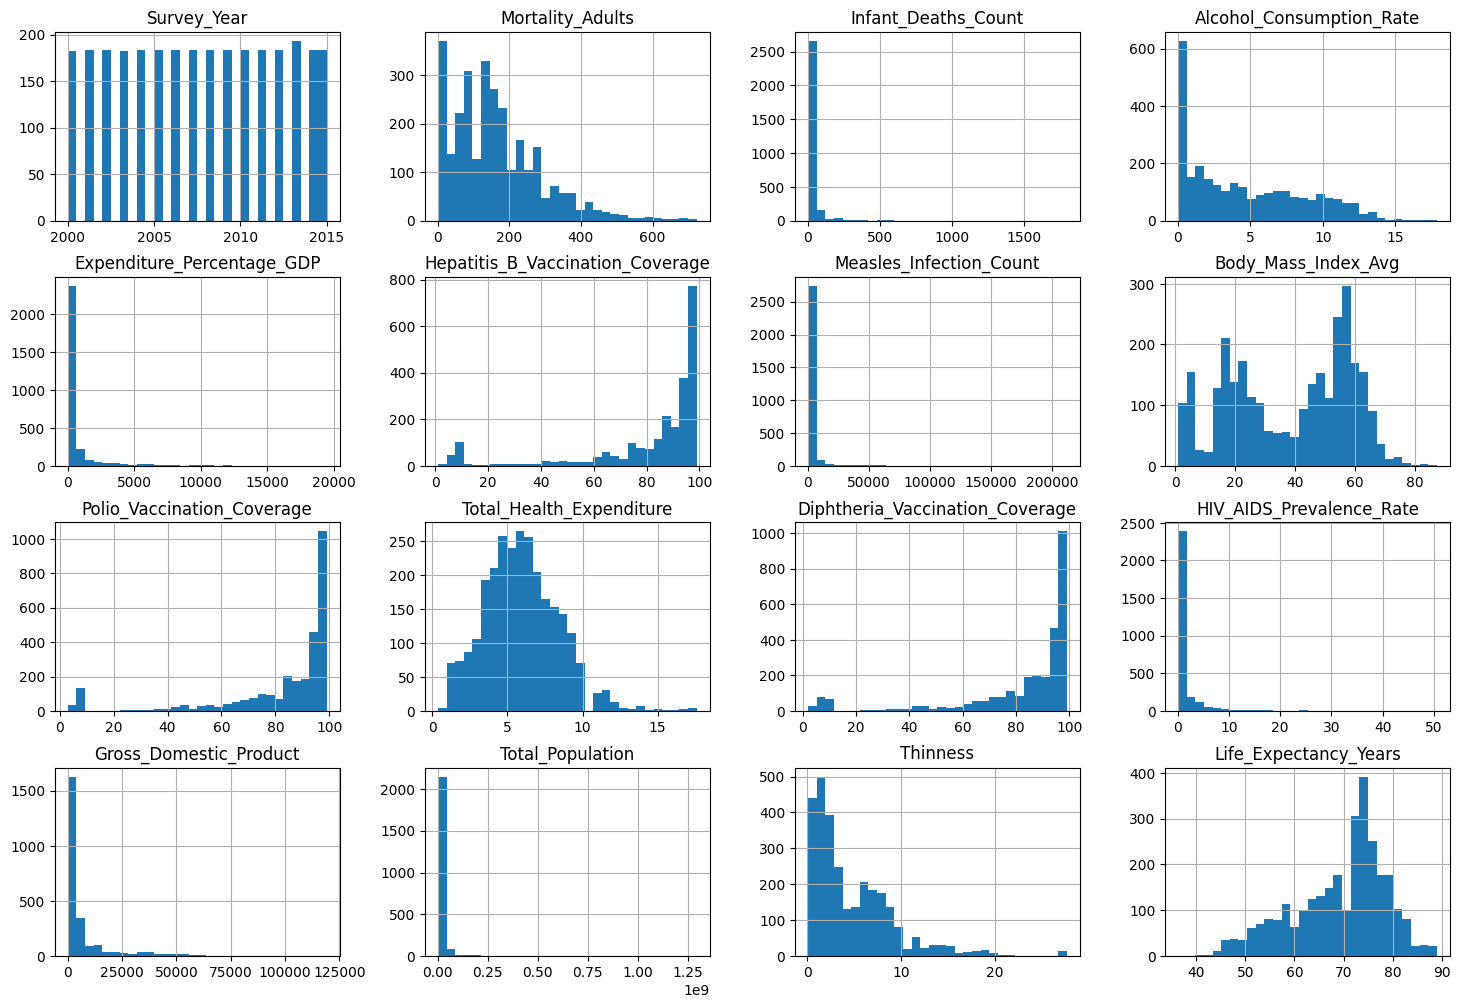

In [13]:
data.hist(bins=30, figsize=(18, 12))
plt.show()

### check for outliers 

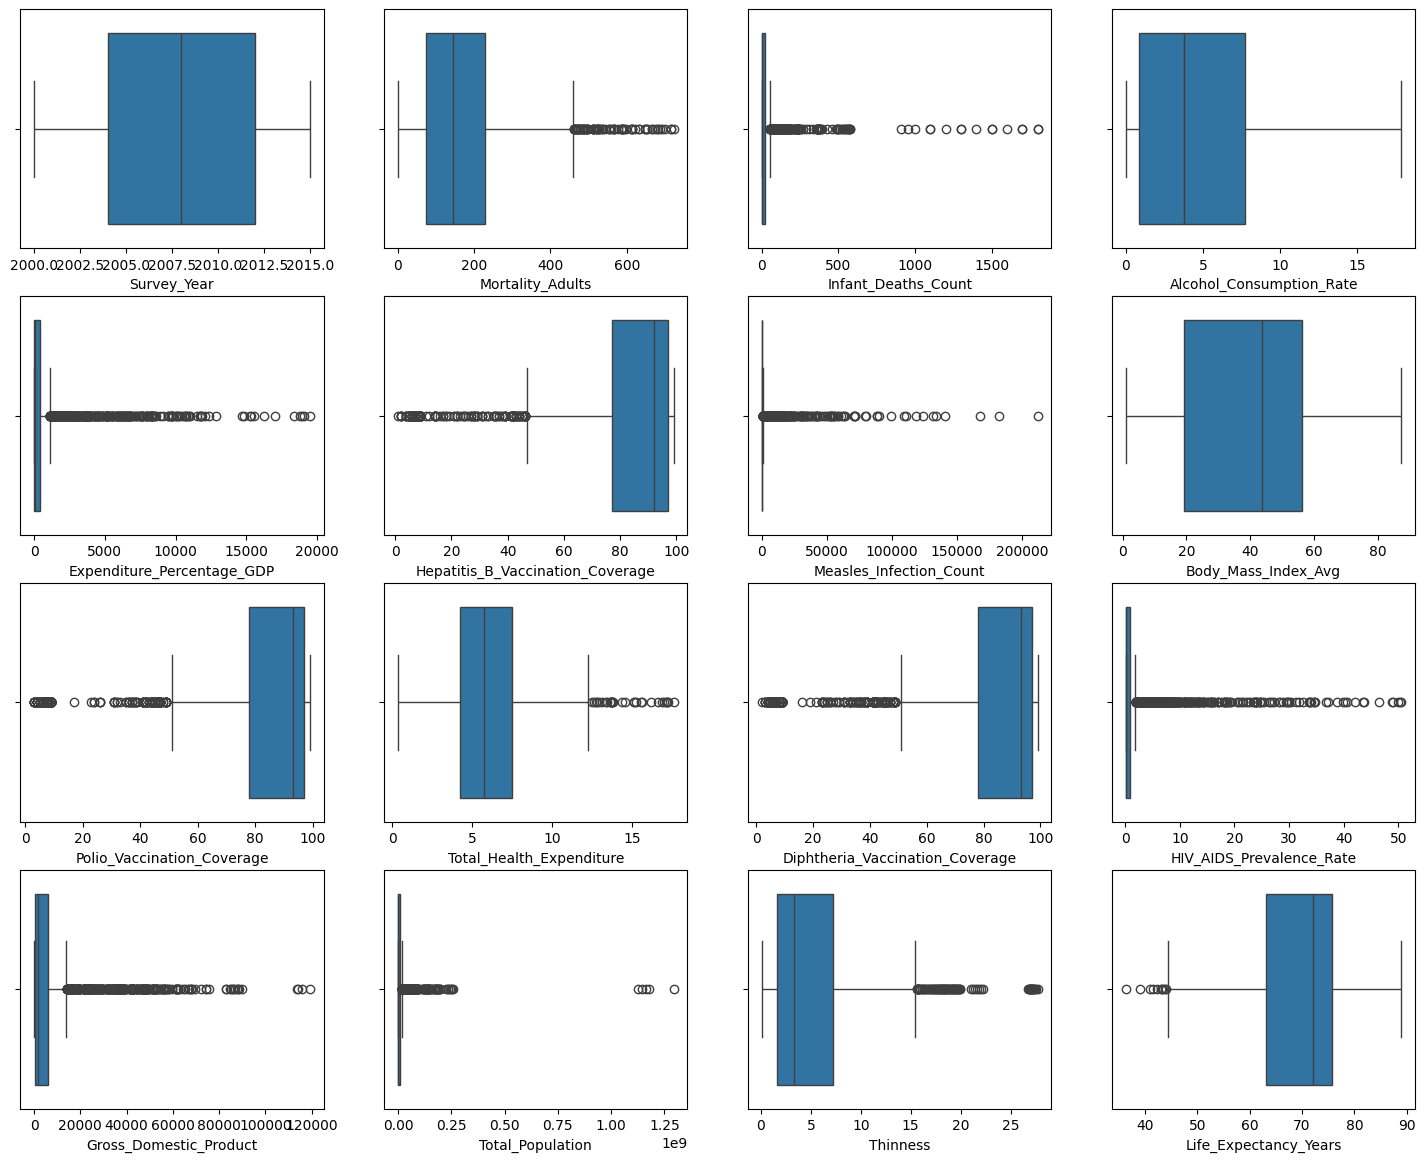

In [14]:
cols = data.select_dtypes("number").columns

fig = plt.figure(figsize=(18,18))
c = 1
for col in cols:
    plt.subplot(5,4,c)
    g = sns.boxplot(x=col, data=data)
    c = c + 1

<h1 style="color:darkred;">Observations from Exploring the Data</h1>
<ul>
    <li> <strong>Unnnamed column:</strong> It is useless, so I dropped it. </li>
    <li> <strong>Data Types:</strong> Defined the data into categorical and numerical types. </li>
    <li> <strong>Duplicates:</strong> There are no duplicate entries in the data. </li>
    <li> <strong>Missing Values:</strong> Most of the columns have small number of missing value but </li>
        <ul>
            <li>Gross Domestic Product: <span style="color:red;">15.25%</span> missing</li>
            <li>Total Population: <span style="color:red;">22.19%</span> missing</li>
            <li>Hepatitis B Vaccination Coverage: <span style="color:red;">18.82%</span> missing</li>
            <li>Total Health Expenditure: <span style="color:red;">7.73%</span> missing</li>
            <li>Alcohol Consumption Rate: <span style="color:red;">6.60%</span> missing</li>
        </ul>
    </li>
    <li> <strong>Skewness:</strong> Many columns exhibit skewness, which should be handled appropriately. </li>
    <li> <strong>Outliers:</strong> Detected many outliers through boxplots. These should be removed or handled. </li>
    <li> <strong>Scaling:</strong> The data has varying ranges, so it needs to be scaled. </li>
</ul>


<h2 style="color:darkred;">Checking for Wrong Values</h2>
<p>Before analyzing each column, we need to define some important notations and rules:</p>
<ul>
    <li><strong>Per 1000 Columns:</strong> If a value exceeds 1000, it must be dropped.</li>
    <li><strong>Percentage Columns:</strong> If a value exceeds 100, it must be dropped.</li>
    <li><strong>Handling Missing Values:</strong>
        <ul>
            <li>Columns with a <em>small amount</em> of missing values will be imputed using the <strong>K-Nearest Neighbor Imputer</strong>.</li>
            <li>Columns with a <em>large amount</em> of missing values(>15) will be handled at a later stage.</li>
        </ul>
    </li>
</ul>


In [15]:
per_col=['Mortality_Adults']
percent_col= ['Alcohol_Consumption_Rate', 'Expenditure_Percentage_GDP', 'Hepatitis_B_Vaccination_Coverage', 'Polio_Vaccination_Coverage', 'Total_Health_Expenditure', 'Diphtheria_Vaccination_Coverage', 'HIV_AIDS_Prevalence_Rate', 'Thinness']

for col in per_col:
        data.loc[data[col] > 1000, col] = np.nan

for col in percent_col:
        data.loc[data[col] > 100, col] = np.nan

In [16]:
data.isna().sum()*100/len(data)

Nation                               0.034037
Survey_Year                          0.068074
Country_Category                     0.102110
Mortality_Adults                     0.442478
Infant_Deaths_Count                  0.000000
Alcohol_Consumption_Rate             6.603131
Expenditure_Percentage_GDP          44.349898
Hepatitis_B_Vaccination_Coverage    18.822328
Measles_Infection_Count              0.068074
Body_Mass_Index_Avg                  1.157250
Polio_Vaccination_Coverage           0.646698
Total_Health_Expenditure             7.726344
Diphtheria_Vaccination_Coverage      0.646698
HIV_AIDS_Prevalence_Rate             0.000000
Gross_Domestic_Product              15.248468
Total_Population                    22.191967
Thinness                             1.157250
Life_Expectancy_Years                0.340368
dtype: float64

<h3 style="color:darkblue;">Expenditure_Percentage_GDP</h3>
<p>
Upon examining the <strong>describe</strong> statistics of this column, it is evident that:
</p>
<ul>
    <li>The <strong>standard deviation</strong> is extremely large, indicating high variability.</li>
    <li>This column represents percentages, <strong>yet almost half of the data exceeds 100</strong>, which is invalid.</li>
</ul>
<p>Based on these observations, I have decided to drop this column.</p>


In [17]:
data.drop(columns = 'Expenditure_Percentage_GDP',inplace = True)

<h3 style="color:darkblue;">Methods for Handling Missing Values</h3>
<p>There are several methods available for handling missing values, including:</p>
<ul>
    <li><strong>Pandas:</strong> <code>interpolate()</code></li>
    <li><strong>Scikit-learn:</strong> <code>SimpleImputer</code></li>
    <li><strong>Scikit-learn Models:</strong> Techniques like <code>K-Nearest Neighbor Imputer</code></li>
</ul>
<h4 style="color:darkblue;">Approach</h4>
<p>
For columns with a <strong>small amount</strong> of missing values, I will use the 
<code>K-Nearest Neighbor Imputer</code> to handle them.
</p>


In [18]:
from sklearn.impute import KNNImputer
imputede_col = ['Mortality_Adults', 'Measles_Infection_Count','Alcohol_Consumption_Rate','Total_Health_Expenditure'
                ,'Body_Mass_Index_Avg', 'Polio_Vaccination_Coverage',
                'Thinness', 'Life_Expectancy_Years', 'Diphtheria_Vaccination_Coverage']

imputer = KNNImputer(n_neighbors=5)

data_imputed = imputer.fit_transform(data[imputede_col])
data_imputed_df = pd.DataFrame(data_imputed, columns=imputede_col)

# Round and convert the 'Mortality_Adults' column to integer
data_imputed_df['Mortality_Adults'] = data_imputed_df['Mortality_Adults'].round().astype(int)
data[imputede_col] = data_imputed_df

In [19]:
data.isna().sum()*100/len(data)

Nation                               0.034037
Survey_Year                          0.068074
Country_Category                     0.102110
Mortality_Adults                     0.000000
Infant_Deaths_Count                  0.000000
Alcohol_Consumption_Rate             0.000000
Hepatitis_B_Vaccination_Coverage    18.822328
Measles_Infection_Count              0.000000
Body_Mass_Index_Avg                  0.000000
Polio_Vaccination_Coverage           0.000000
Total_Health_Expenditure             0.000000
Diphtheria_Vaccination_Coverage      0.000000
HIV_AIDS_Prevalence_Rate             0.000000
Gross_Domestic_Product              15.248468
Total_Population                    22.191967
Thinness                             0.000000
Life_Expectancy_Years                0.000000
dtype: float64

#### the remaining columns i will see it individually 

<h1 style="color:darkred; font-weight:bold;">Nation</h1>


In [20]:
data["Nation"].value_counts().sort_values(ascending=False)

Nation
Syrian Arab Republic    16
Nicaragua               16
New Zealand             16
Montenegro              16
Bahrain                 16
                        ..
Tuvalu                   1
Cook Islands             1
Palau                    1
Monaco                   1
Dominica                 1
Name: count, Length: 193, dtype: int64

In [21]:
data["Nation"].isnull().sum()

1

In [22]:
# as it is only a one instance and it's categorical we can just drop it 
data = data.dropna(subset=["Nation"])
data["Nation"].isna().sum()

0

<h1 style="color:darkred; font-weight:bold;">Survey_year</h1>

In [23]:
data["Survey_Year"].value_counts().sort_values(ascending=False)

Survey_Year
2013.0    193
2006.0    183
2007.0    183
2014.0    183
2008.0    183
2011.0    183
2015.0    183
2009.0    183
2004.0    183
2001.0    183
2012.0    183
2002.0    183
2010.0    183
2000.0    182
2005.0    182
2003.0    182
Name: count, dtype: int64

In [24]:
data[data["Survey_Year"].isna()]

,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
134,Niger,NaN,Developing,28,56,0.10,NaN,54190.0,14.6,44.0,6.23,41.0,1.6,215.8548,1265687.0,12.3,52.1
177,Sao Tome and Principe,NaN,Developing,224,0,5.07,NaN,0.0,2.7,87.0,8.86,82.0,1.5,NaN,13866.0,8.0,62.6


<h3 style="color:darkblue;">Handling Missing Survey Year</h3>
<p>
Since the <strong>survey year</strong> might be continuous, we can leverage the values of features before and after it 
to fill in the missing data.
</p>


In [25]:
missing_rows = data[data['Survey_Year'].isna()]

for index, row in missing_rows.iterrows():
    start_index = max(0, index - 5)
    end_index = min(len(data), index + 6)  
    surrounding_rows = data.iloc[start_index:end_index]

    survey_year_rows = surrounding_rows[['Survey_Year']]

    print(f"Rows surrounding missing value at index {index}:")
    print(survey_year_rows)  
    print("\n" + "-"*50 + "\n")


Rows surrounding missing value at index 134:
     Survey_Year
129       2007.0
130       2013.0
131       2013.0
132       2002.0
133       2000.0
134          NaN
135       2015.0
136       2007.0
137       2003.0
138       2006.0
139       2015.0

--------------------------------------------------

Rows surrounding missing value at index 177:
     Survey_Year
172       2000.0
173       2015.0
174       2002.0
175       2001.0
176       2003.0
177          NaN
178       2002.0
179       2015.0
180       2008.0
181       2001.0
182       2004.0

--------------------------------------------------



<h3 style="color:darkblue;">Unfortunately, the Data is Not Continuous</h3>
<p>
Due to the discontinuity in the data, we need to explore alternative methods for handling missing values. 
I have decided to use the <strong>K-Nearest Neighbor (KNN) Imputer</strong> for this task.
</p>

In [26]:
year_imputed = imputer.fit_transform(data[["Survey_Year"]])
data["Survey_Year"] = year_imputed.round().astype(int)

In [27]:
data.iloc[134]

Nation                                   Niger
Survey_Year                               2008
Country_Category                    Developing
Mortality_Adults                            28
Infant_Deaths_Count                         56
Alcohol_Consumption_Rate                   0.1
Hepatitis_B_Vaccination_Coverage           NaN
Measles_Infection_Count                54190.0
Body_Mass_Index_Avg                       14.6
Polio_Vaccination_Coverage                44.0
Total_Health_Expenditure                  6.23
Diphtheria_Vaccination_Coverage           41.0
HIV_AIDS_Prevalence_Rate                   1.6
Gross_Domestic_Product                215.8548
Total_Population                     1265687.0
Thinness                                  12.3
Life_Expectancy_Years                     52.1
Name: 134, dtype: object

In [28]:
data.iloc[177]

Nation                              Sao Tome and Principe
Survey_Year                                          2008
Country_Category                               Developing
Mortality_Adults                                      224
Infant_Deaths_Count                                     0
Alcohol_Consumption_Rate                             5.07
Hepatitis_B_Vaccination_Coverage                      NaN
Measles_Infection_Count                               0.0
Body_Mass_Index_Avg                                   2.7
Polio_Vaccination_Coverage                           87.0
Total_Health_Expenditure                             8.86
Diphtheria_Vaccination_Coverage                      82.0
HIV_AIDS_Prevalence_Rate                              1.5
Gross_Domestic_Product                                NaN
Total_Population                                  13866.0
Thinness                                              8.0
Life_Expectancy_Years                                62.6
Name: 177, dty

In [29]:
data["Survey_Year"].isna().sum()

0

 - the data is almost distributed equally between the year
 - you can also notice the data is between 2000 to 2015
 - there is only two missing values and i replaced it by the most fequent value 

<h1 style="color:darkred; font-weight:bold;">Country_Category</h1>

In [30]:
data[data["Country_Category"].isna()]

,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
9,Swaziland,2011,NaN,438,2,5.200,91.0,0.0,3.2,85.0,8.610,91.0,15.7,3934.273250,1225258.0,5.1,55.0
54,Lebanon,2008,NaN,98,1,1.670,81.0,24.0,62.5,75.0,8.700,81.0,0.1,712.775759,411147.0,4.7,74.5
101,Chad,2015,NaN,356,46,2.398,46.0,418.0,19.1,52.0,3.948,46.0,2.8,777.248751,149413.0,8.5,53.1


I searched and found that 
- Swaziland: Now known as Eswatini, it is considered a developing country.
- Lebanon: Lebanon is generally classified as a developing country.
- Chad: Chad is classified as a developing country.
   - so i can hardcode it 

In [31]:
data.loc[(data['Nation'] == 'Swaziland') & (data['Country_Category'].isna()), 'Country_Category'] = 'Developing'
data.loc[(data['Nation'] == 'Lebanon') & (data['Country_Category'].isna()), 'Country_Category'] = 'Developing'
data.loc[(data['Nation'] == 'Chad') & (data['Country_Category'].isna()), 'Country_Category'] = 'Developing'

<Axes: ylabel='count'>

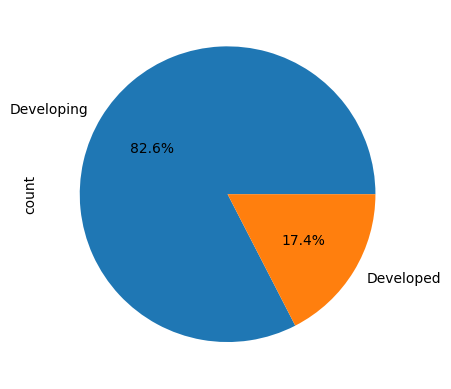

In [32]:
data['Country_Category'].value_counts().plot.pie(autopct='%1.1f%%')

<h3 style="color:darkred; font-size:24px;">Handling Data with Missing Values Greater Than 15%</h3>
<p style="font-size:18px;">
For data with missing values greater than 15%, I have a very efficient approach that I believe is a best practice. 
Since a significant portion of the data is missing, my plan is to split the dataset into defined values and <code>NaN</code> values. 
Then, I will train a model (such as <strong>Random Forest Regressor</strong>) on the defined values to predict the missing data.
</p>
<p style="font-size:18px;">
However, this approach might take a considerable amount of time, so as a more efficient alternative, 
I will use the <strong>K-Nearest Neighbor (KNN) Imputer</strong>, which I believe is very effective.
</p>
<p style="font-size:18px;">
If there is enough time, I will consider experimenting with the alternative method.
</p>


In [33]:
from sklearn.impute import KNNImputer


imputede_col_15 = ['Hepatitis_B_Vaccination_Coverage', 'Gross_Domestic_Product', 'Total_Population']


imputer = KNNImputer(n_neighbors=5)
data_imputed_15 = imputer.fit_transform(data[imputede_col_15])


data_imputed_df_15 = pd.DataFrame(data_imputed_15, columns=imputede_col_15)
data_imputed_df_15[imputede_col_15] = data_imputed_df_15[imputede_col_15].round().astype(int)


data[imputede_col_15] = data_imputed_df_15


In [34]:
data.isna().sum()

Nation                              0
Survey_Year                         0
Country_Category                    0
Mortality_Adults                    0
Infant_Deaths_Count                 0
Alcohol_Consumption_Rate            0
Hepatitis_B_Vaccination_Coverage    1
Measles_Infection_Count             0
Body_Mass_Index_Avg                 0
Polio_Vaccination_Coverage          0
Total_Health_Expenditure            0
Diphtheria_Vaccination_Coverage     0
HIV_AIDS_Prevalence_Rate            0
Gross_Domestic_Product              1
Total_Population                    1
Thinness                            0
Life_Expectancy_Years               0
dtype: int64

In [35]:
data[imputede_col_15] = data[imputede_col_15].fillna(data[imputede_col_15].median())
data.isna().sum()

Nation                              0
Survey_Year                         0
Country_Category                    0
Mortality_Adults                    0
Infant_Deaths_Count                 0
Alcohol_Consumption_Rate            0
Hepatitis_B_Vaccination_Coverage    0
Measles_Infection_Count             0
Body_Mass_Index_Avg                 0
Polio_Vaccination_Coverage          0
Total_Health_Expenditure            0
Diphtheria_Vaccination_Coverage     0
HIV_AIDS_Prevalence_Rate            0
Gross_Domestic_Product              0
Total_Population                    0
Thinness                            0
Life_Expectancy_Years               0
dtype: int64

#### now all the there is no missing values 
#### so finally i used KNN imputer to fill all the missing values 


<h1 style="color:darkred; font-size:28px;">Handling Outliers</h1>
<h4 style="font-size:20px;">
    I will mainly use the <strong>Random Forest and other ensemble</strong> models, which is less sensitive to outliers. However, for the task of cleaning and validating the data, I will apply additional steps.
</h4>
<ul style="font-size:18px;">
    <li><strong>Clip:</strong> I will clip the upper and lower bounds using the <strong>IQR (Interquartile Range)</strong> method.</li>
</ul>


In [36]:
outlier_cols = ['Mortality_Adults', 'Infant_Deaths_Count', 'Alcohol_Consumption_Rate','Hepatitis_B_Vaccination_Coverage', 'Measles_Infection_Count', 'Body_Mass_Index_Avg', 'Polio_Vaccination_Coverage', 'Total_Health_Expenditure', 'Diphtheria_Vaccination_Coverage', 'HIV_AIDS_Prevalence_Rate', 'Gross_Domestic_Product', 'Total_Population', 'Thinness', 'Life_Expectancy_Years']

for col_name in outlier_cols:
    # Calculate quartiles and IQR
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[col_name] = data[col_name].clip(lower_bound, upper_bound)


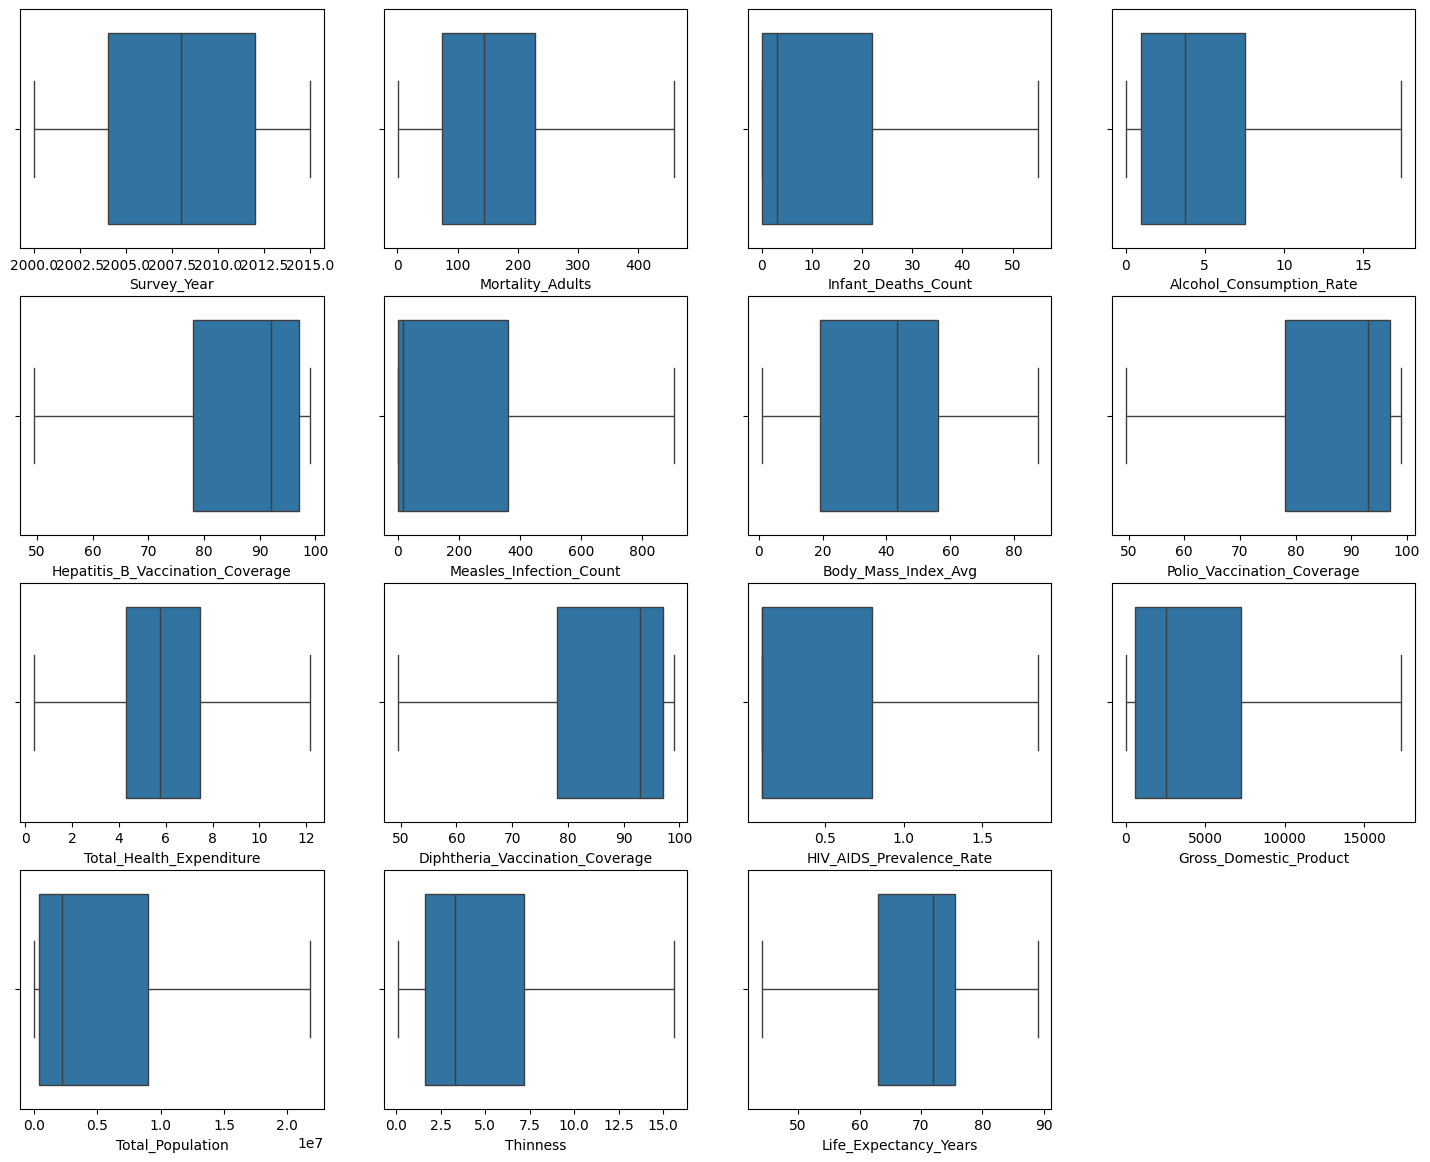

In [37]:
cols = data.select_dtypes("number").columns

fig = plt.figure(figsize=(18,18))
c = 1
for col in cols:
    plt.subplot(5,4,c)
    g = sns.boxplot(x=col, data=data)
    c = c + 1

#### from the boxplots there is no more outliers

<h1 style="color:darkred; font-size:28px;">Handling Skewness</h1>



### skewness in the original data

In [38]:
num_col = ['Mortality_Adults', 'Infant_Deaths_Count', 'Alcohol_Consumption_Rate','Hepatitis_B_Vaccination_Coverage', 'Measles_Infection_Count', 'Body_Mass_Index_Avg', 'Polio_Vaccination_Coverage', 'Total_Health_Expenditure', 'Diphtheria_Vaccination_Coverage', 'HIV_AIDS_Prevalence_Rate', 'Gross_Domestic_Product', 'Total_Population', 'Thinness', 'Life_Expectancy_Years']
original_skewness = data[num_col].skew()
original_skewness

Mortality_Adults                    0.767875
Infant_Deaths_Count                 1.288397
Alcohol_Consumption_Rate            0.601499
Hepatitis_B_Vaccination_Coverage   -1.265618
Measles_Infection_Count             1.185023
Body_Mass_Index_Avg                -0.210334
Polio_Vaccination_Coverage         -1.230448
Total_Health_Expenditure            0.307941
Diphtheria_Vaccination_Coverage    -1.248526
HIV_AIDS_Prevalence_Rate            1.208872
Gross_Domestic_Product              1.233899
Total_Population                    1.210987
Thinness                            1.080016
Life_Expectancy_Years              -0.617087
dtype: float64

In [39]:
positive_skewed = original_skewness[original_skewness>.5].index
negative_skewed = original_skewness[original_skewness< -.5].index

<h2 style="color:darkblue; font-size:24px;">Positive Skewness</h2>
<p style="font-size:18px;">
    The following transformers will be exprimented for handling the data:
</p>
<ul style="font-size:18px;">
    <li><strong>Log:</strong> log_transformer</li>
    <li><strong>Square Root:</strong> sqrt_transformer</li>
    <li><strong>Yeo-Johnson:</strong> yeo_transformer</li>
    <li><strong>Quantile:</strong> quantile</li>
</ul>


In [40]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, QuantileTransformer
from scipy.stats import skew
import copy

def calculate_skewness(df):
    return df.apply(skew)


log_transformer = FunctionTransformer(np.log1p, validate=True)
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
yeo_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
quantile = QuantileTransformer(output_distribution='normal')

transformers = {
    'Log': log_transformer,
    'Square Root': sqrt_transformer,
    'Yeo-Johnson': yeo_transformer,
    'Quantile': quantile
}

results_df = pd.DataFrame(index=transformers.keys(), columns=positive_skewed)
data_copy = data.copy()
results_df.loc['Original'] = calculate_skewness(data_copy[positive_skewed])


for name, transformer in transformers.items():
    transformed_data = transformer.fit_transform(data_copy[positive_skewed])
    transformed_df = pd.DataFrame(transformed_data, columns=positive_skewed)
    skewness1 = calculate_skewness(transformed_df)
    

    results_df.loc[name] = skewness1

results_df


,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Measles_Infection_Count,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness
Log,-1.171226,0.324913,-0.291881,0.173352,1.100848,-0.605282,-1.112524,0.042143
Square Root,-0.062524,0.701488,-0.127676,0.837490,1.051517,0.594604,0.578254,0.382711
Yeo-Johnson,-0.121655,0.126959,-0.085540,0.085099,0.782963,-0.089710,-0.161996,0.007824
Quantile,1.286744,-0.010440,-1.685263,0.142872,0.794932,1.663367,1.604670,0.939504
Original,0.767483,1.287739,0.601192,1.184417,1.208255,1.233268,1.210368,1.079465


<h3 style="color:darkblue; font-size:22px;">Conclusion: Best Transformer</h3>
<p style="font-size:18px;">
    Based on the results from applying all transformers, the <strong>Yeo-Johnson transformer</strong> is the best
</p>

In [41]:
data_copy[positive_skewed] = yeo_transformer.fit_transform(data_copy[positive_skewed])

<h2 style="color:darkblue; font-size:24px;">Negative Skewness</h2>
<p style="font-size:18px;">
    The following transformers will be applied to the data:
</p>
<ul style="font-size:18px;">
    <li><strong>Exponential:</strong> exp_transformer</li>
    <li><strong>Square:</strong> square_transformer</li>
    <li><strong>Cube:</strong> cube_transformer</li>
    <li><strong>Reciprocal:</strong> reciprocal_transformer</li>
    <li><strong>Log:</strong> log_transformer</li>
    <li><strong>Quantile:</strong> quantile</li>
</ul>


In [42]:
exp_transformer = FunctionTransformer(np.exp, validate=True)        # exp(x)
square_transformer = FunctionTransformer(np.square, validate=True)  # x^2
cube_transformer = FunctionTransformer(lambda x: np.power(x, 3), validate=True)  # x^3
reciprocal_transformer = FunctionTransformer(lambda x: 1 / (x + 1e-6), validate=True)  # 1/x to avoid division by zero
log_transformer = FunctionTransformer(np.log1p, validate=True)
quantile = QuantileTransformer(output_distribution='normal')


transformers = {
    'Exponential': exp_transformer,
    'Square': square_transformer,
    'Cube': cube_transformer,
    'Reciprocal': reciprocal_transformer,
    'Log': log_transformer,
    'quantile' : quantile
}
results_df1 = pd.DataFrame(index=transformers.keys(), columns=data_copy[negative_skewed].columns)


results_df1.loc['Original'] = calculate_skewness(data_copy[negative_skewed])

for name, transformer in transformers.items():
    transformed_data = transformer.fit_transform(data_copy[negative_skewed])
    transformed_df = pd.DataFrame(transformed_data, columns=negative_skewed)
    skewness = calculate_skewness(transformed_df)
    
    results_df1.loc[name] = skewness

results_df1

,Hepatitis_B_Vaccination_Coverage,Polio_Vaccination_Coverage,Diphtheria_Vaccination_Coverage,Life_Expectancy_Years
Exponential,2.389441,1.875778,1.969970,13.927491
Square,-1.020430,-1.015408,-1.028788,-0.336129
Cube,-0.803855,-0.823044,-0.830711,-0.059123
Reciprocal,1.778649,1.681198,1.699695,1.213768
Log,-1.520864,-1.453617,-1.473824,-0.902508
quantile,-0.065565,0.131339,0.072516,0.032201
Original,-1.264971,-1.229820,-1.247888,-0.616772


<h3 style="color:darkblue; font-size:22px;">Conclusion: Best Transformer</h3>
<p style="font-size:18px;">
    After applying all the transformers, <strong>Saquare</strong> is the most effective in handling the data. 
</p>

In [43]:
data_copy[negative_skewed] = square_transformer.fit_transform(data_copy[negative_skewed])

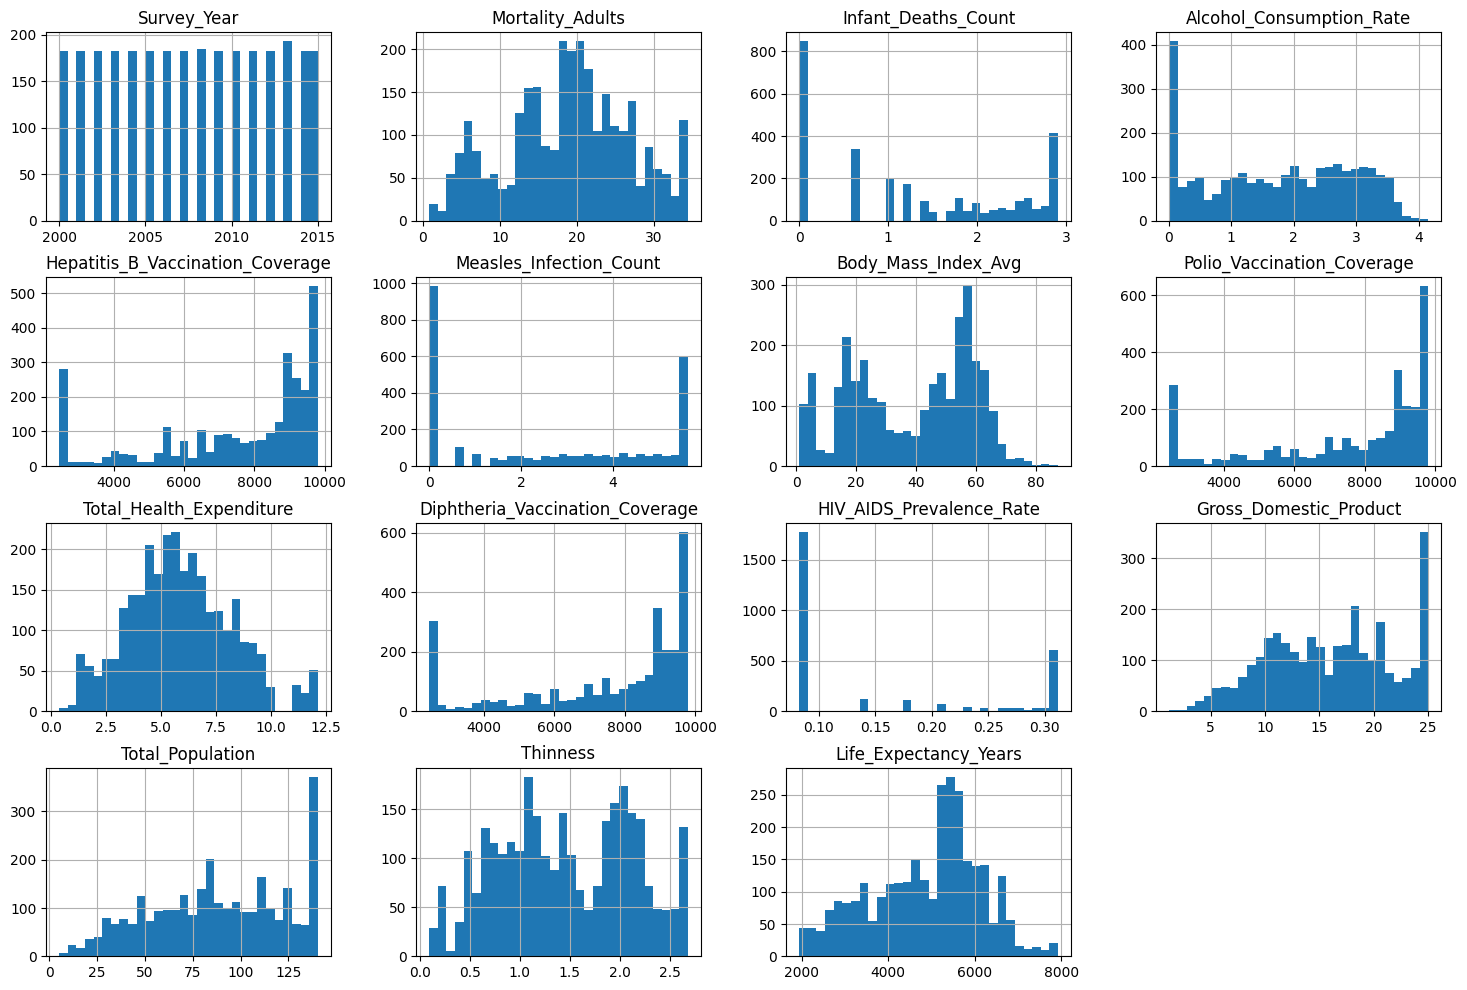

In [44]:
data_copy.hist(bins=30, figsize=(18, 12))
plt.show()

# data cleaning has finished

<h1 style="color:darkred; font-size:28px;">Let's dive into data anlaysis and visulaizations</h1>

### Data over the years 

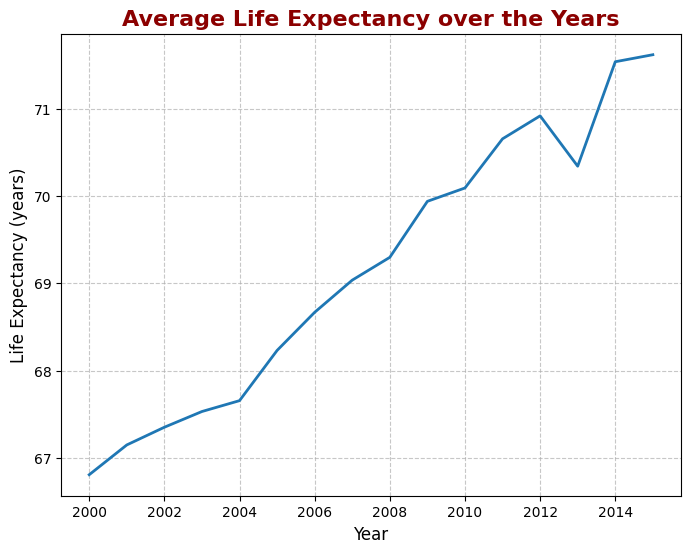

In [45]:
average_life_expectancy = data.groupby('Survey_Year')['Life_Expectancy_Years'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.plot(average_life_expectancy['Survey_Year'], average_life_expectancy['Life_Expectancy_Years'], color='tab:blue', lw=2)

plt.title('Average Life Expectancy over the Years', fontsize=16, fontweight='bold',color="darkred")
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy (years)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.style.use('dark_background')

plt.show()



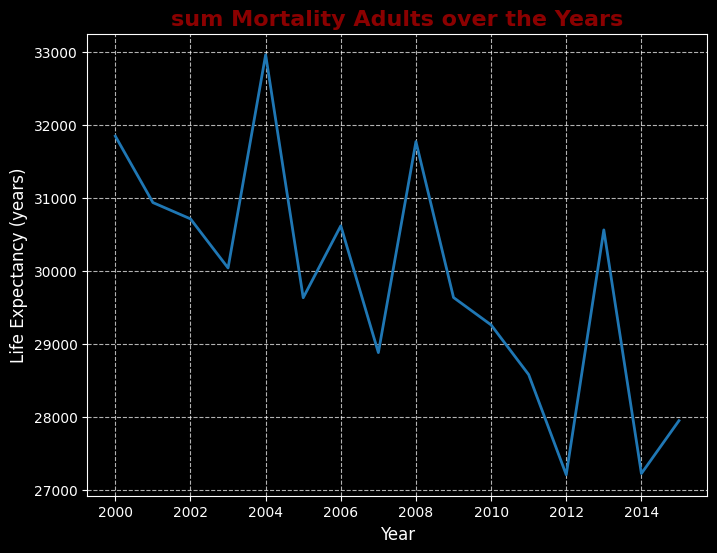

In [46]:
sum_Mortality_Adults = data.groupby('Survey_Year')['Mortality_Adults'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.plot(sum_Mortality_Adults['Survey_Year'], sum_Mortality_Adults['Mortality_Adults'], color='tab:blue', lw=2)

plt.title('sum Mortality Adults over the Years', fontsize=16, fontweight='bold',color="darkred")
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy (years)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.style.use('dark_background')

plt.show()

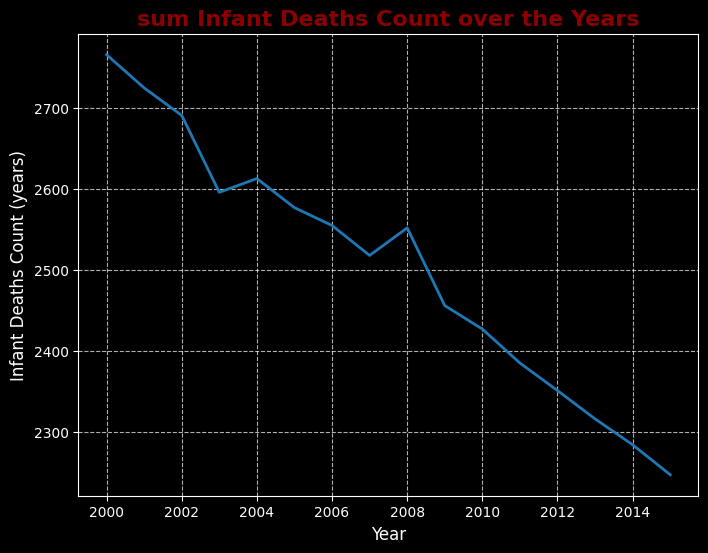

In [47]:
sum_Infant_Deaths_Count = data.groupby('Survey_Year')['Infant_Deaths_Count'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.plot(sum_Infant_Deaths_Count['Survey_Year'], sum_Infant_Deaths_Count['Infant_Deaths_Count'], color='tab:blue', lw=2)

plt.title('sum Infant Deaths Count over the Years', fontsize=16, fontweight='bold',color="darkred")
plt.xlabel('Year', fontsize=12)
plt.ylabel('Infant Deaths Count (years)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.style.use('dark_background')

plt.show()

<h1 style="color:darkred; font-size:28px;">overall look</h1>

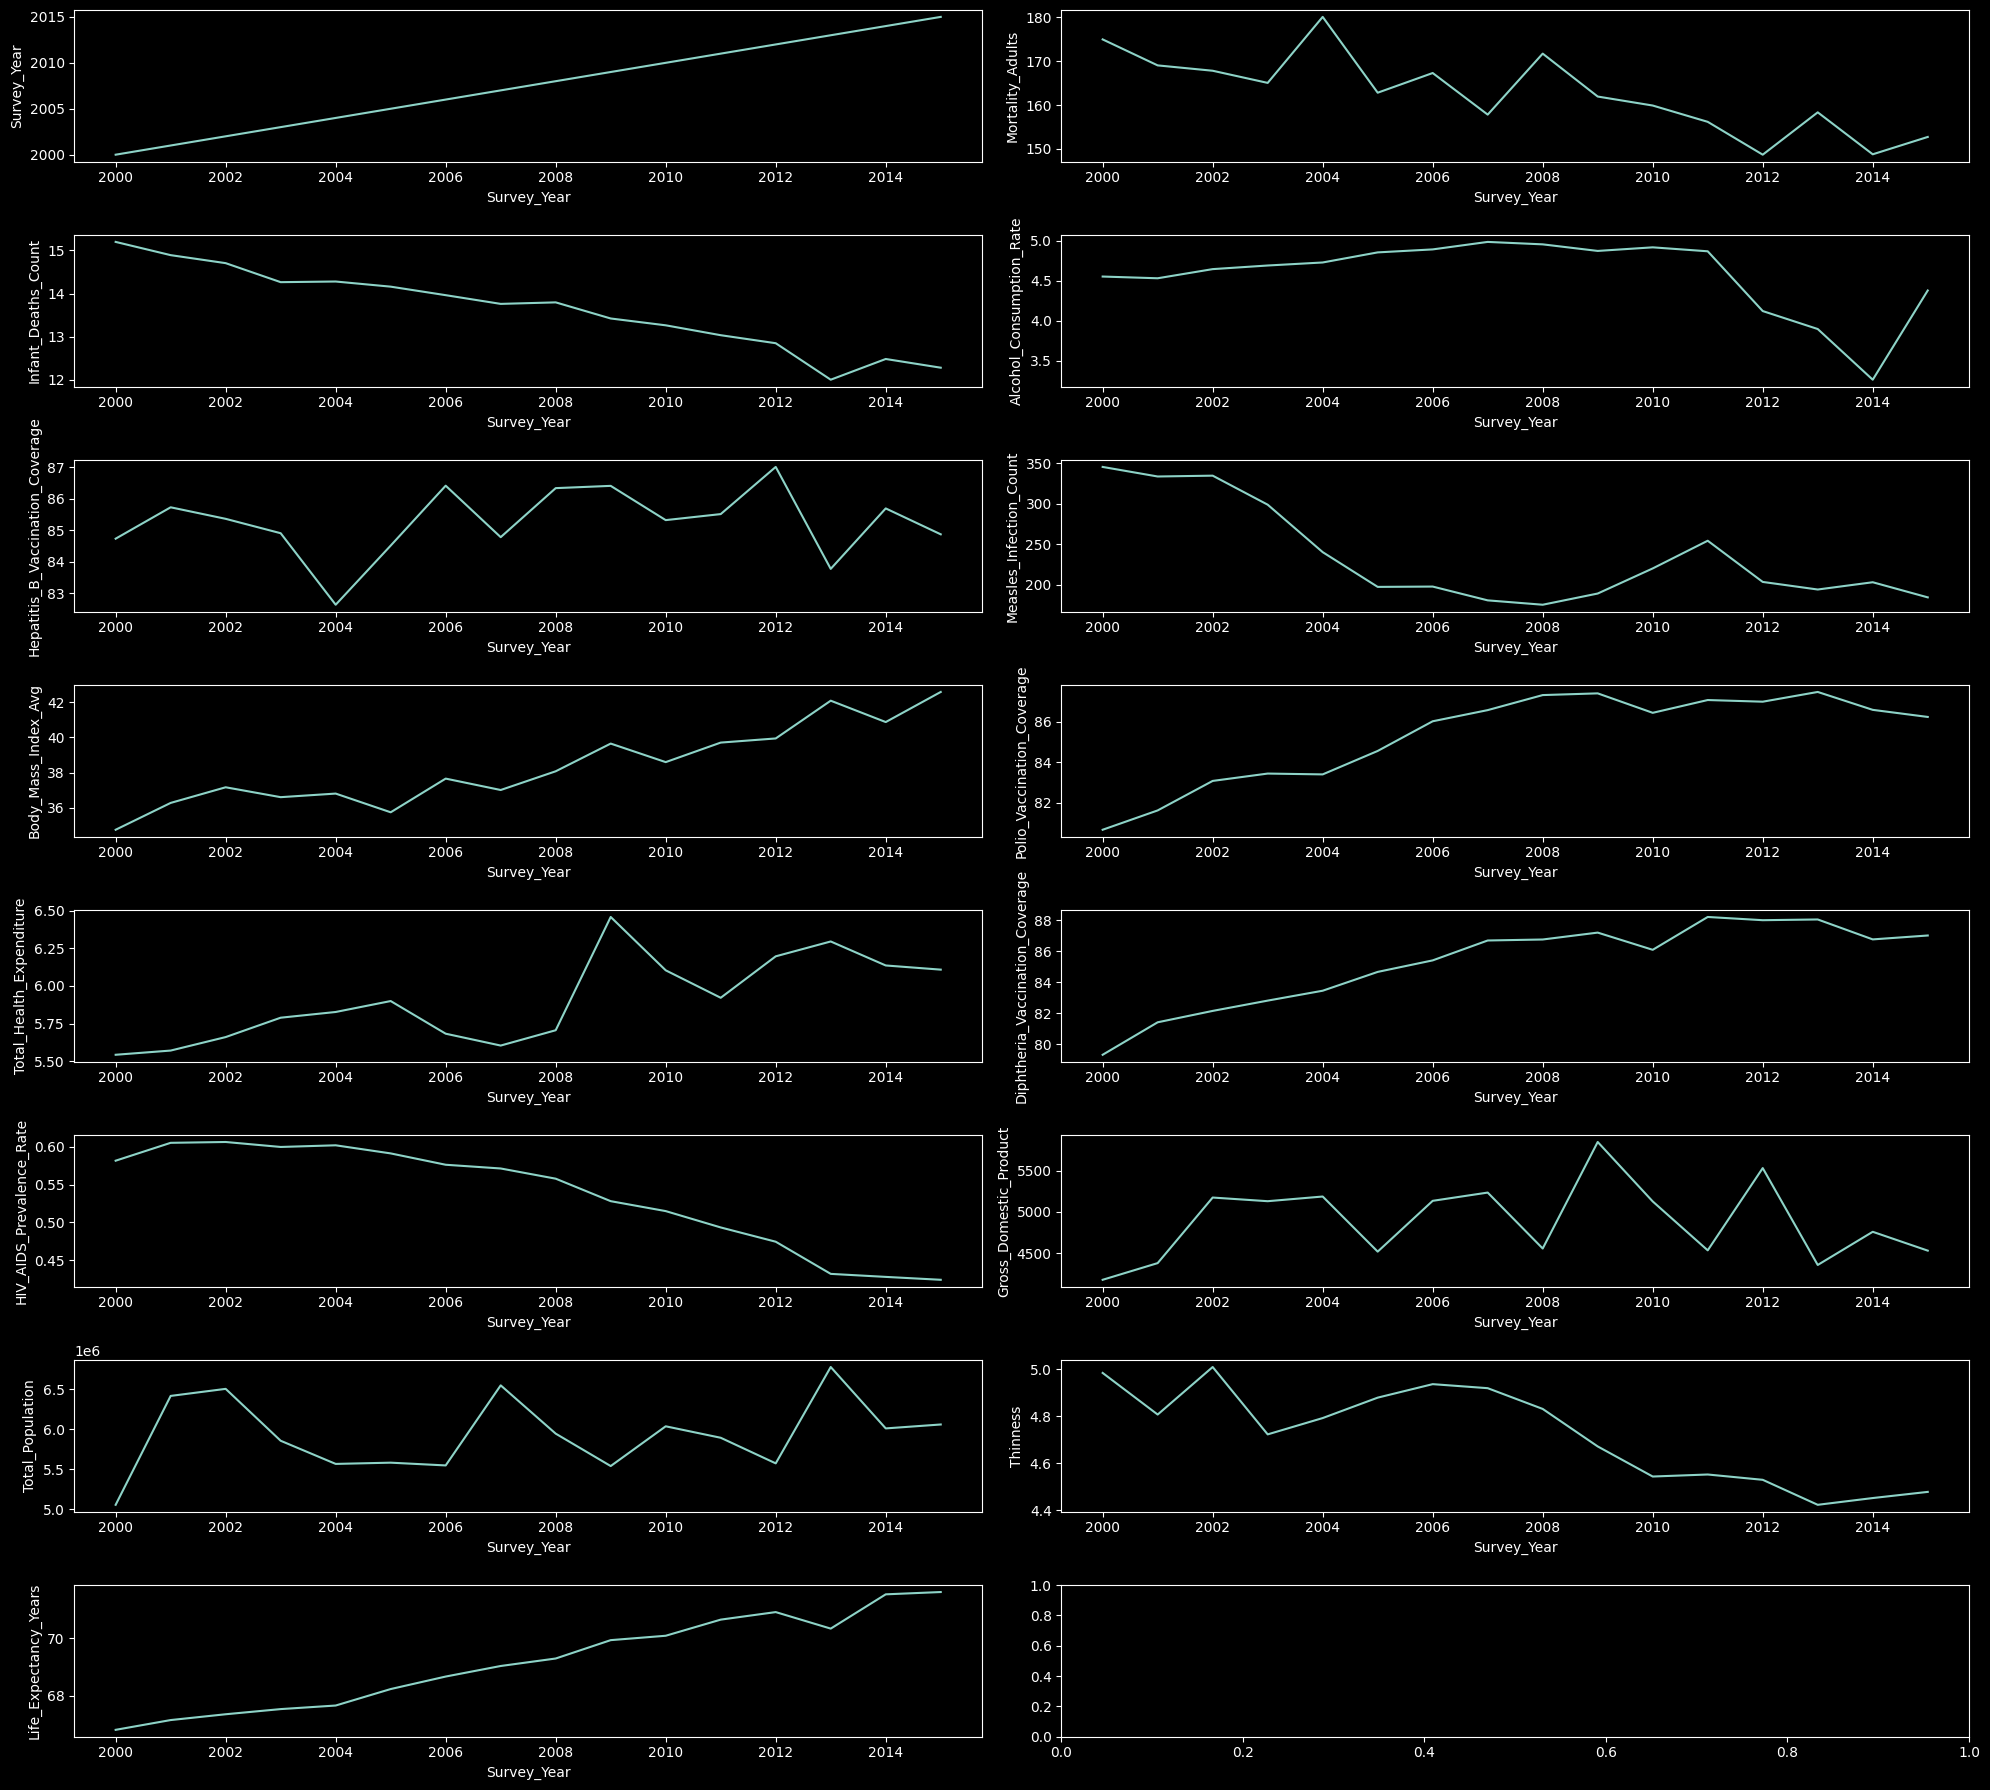

In [48]:
fig, axes = plt.subplots(nrows=(len(data.select_dtypes(include='number').columns) - 1) // 2 + 1, ncols=2, figsize=(20, 18))

for idx, col in enumerate(data.select_dtypes(include='number').columns):
        row_idx = idx // 2
        col_idx = idx % 2
        sns.lineplot(x='Survey_Year', y=col, data=data, ax=axes[row_idx, col_idx], markers=True, ci=None)


plt.tight_layout()
plt.show()

<h2 style="color:darkred; font-size:24px;">Insights and Conclusions</h2>
<ul style="font-size:18px;">
    <li><strong>Life Expectancy:</strong> Shows a steady increase over the years.</li>
    <li><strong>Adult Mortality Rates:</strong> Are inconsistent but exhibit an overall decreasing trend.</li>
    <li><strong>Infant Deaths:</strong> Display a clear and significant decline over the years.</li>
</ul>


<h1 style="color:darkred; font-size:28px;">Developed vs Developing</h1>

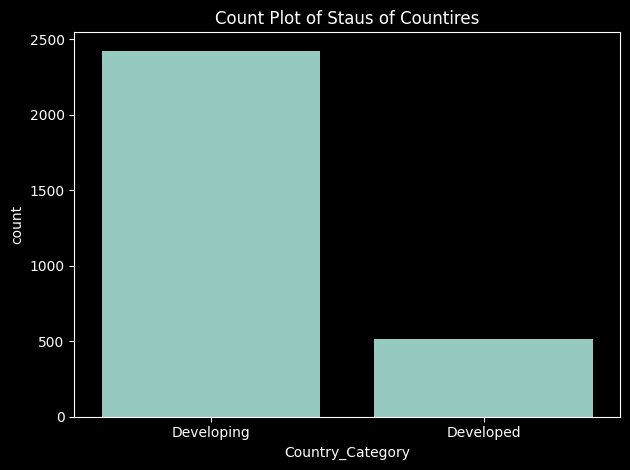

In [49]:
sns.countplot(x=data['Country_Category'])
plt.title('Count Plot of Staus of Countires')
plt.tight_layout()
plt.style.use('ggplot')
plt.show()

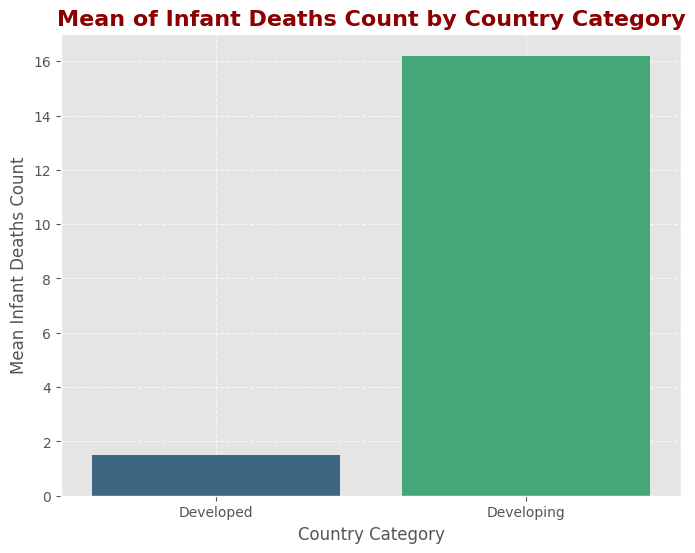

In [50]:
mean_Infant_Deaths_Count = data.groupby('Country_Category')['Infant_Deaths_Count'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Country_Category', y='Infant_Deaths_Count', data=mean_Infant_Deaths_Count, palette='viridis')

plt.title('Mean of Infant Deaths Count by Country Category', fontsize=16, fontweight='bold', color="darkred")
plt.xlabel('Country Category', fontsize=12)
plt.ylabel('Mean Infant Deaths Count', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.style.use('ggplot') 

plt.show()

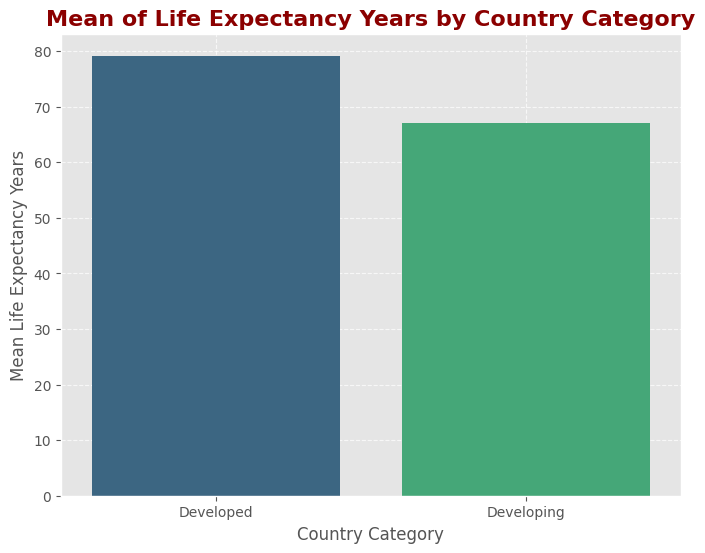

In [51]:
mean_Life_Expectancy_Years = data.groupby('Country_Category')['Life_Expectancy_Years'].mean().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(x='Country_Category', y='Life_Expectancy_Years', data=mean_Life_Expectancy_Years, palette='viridis')


plt.title('Mean of Life Expectancy Years by Country Category', fontsize=16, fontweight='bold', color="darkred")
plt.xlabel('Country Category', fontsize=12)
plt.ylabel('Mean Life Expectancy Years', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.7)
plt.style.use('ggplot') 

plt.show()

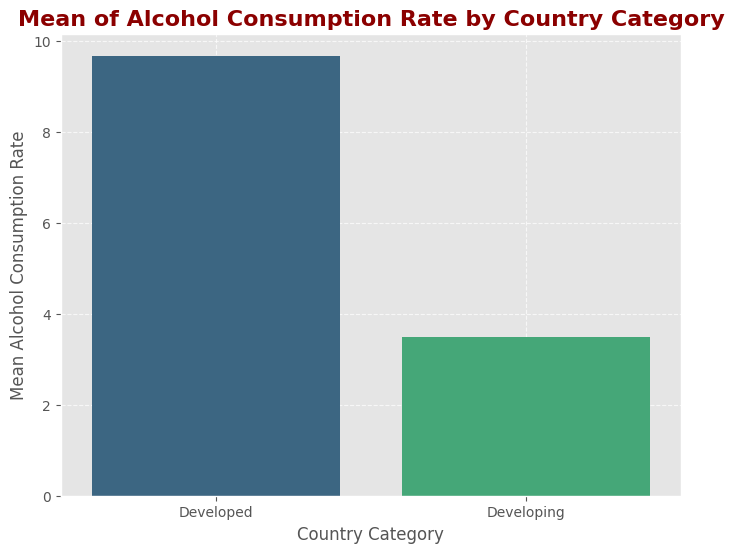

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_Alcohol_Consumption_Rate = data.groupby('Country_Category')['Alcohol_Consumption_Rate'].mean().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(x='Country_Category', y='Alcohol_Consumption_Rate', data=mean_Alcohol_Consumption_Rate, palette='viridis')


plt.title('Mean of Alcohol Consumption Rate by Country Category', fontsize=16, fontweight='bold', color="darkred")
plt.xlabel('Country Category', fontsize=12)
plt.ylabel('Mean Alcohol Consumption Rate', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.7)
plt.style.use('ggplot')  

plt.show()


<h2 style="color:darkred; font-size:24px;">Insights and Conclusions</h2>
<ul style="font-size:18px;">
    <li><strong>Developing countries</strong>is much higher in appearance than developed</li>
    <li><strong>mean infant deaths and mortality Adult</strong>is much higher in  developing countries</li>
    <li><strong>mean life expectancy</strong> is quite higher in developed countries</li>
    <li><strong>Alcohol Consumption</strong> ishigher in developed countries</li>
</ul>

<h2 style="color:darkred; font-size:24px;">Top countries</h2>

## Top Life Expectancy Countries

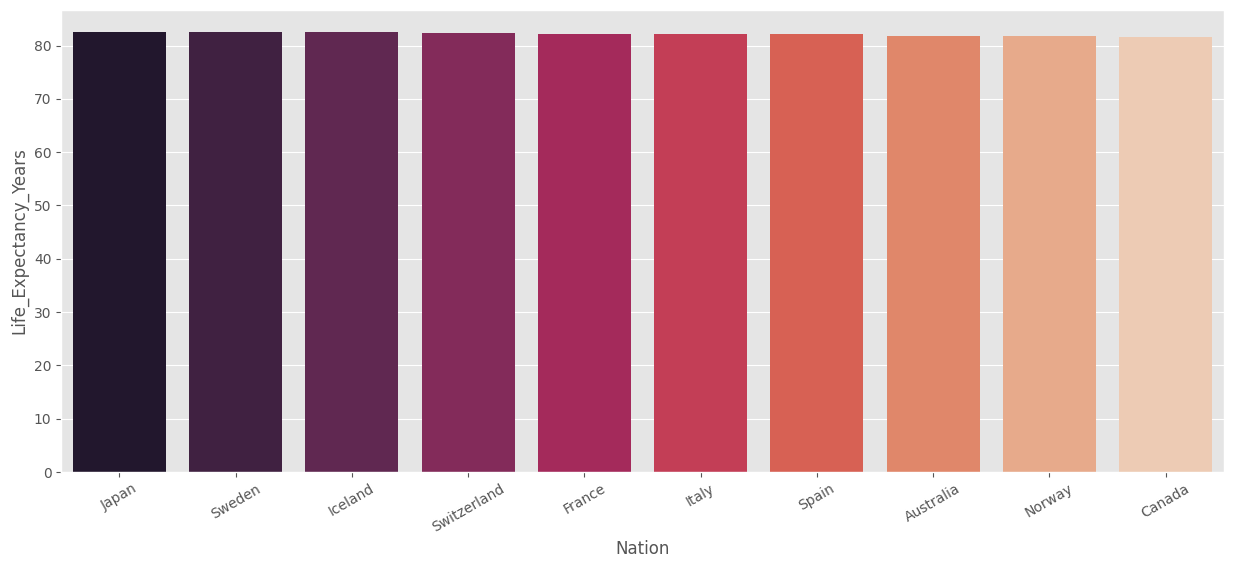

In [53]:
country_life_expectancy = data.groupby('Nation')['Life_Expectancy_Years'].mean().reset_index()

top_countries = country_life_expectancy.sort_values('Life_Expectancy_Years', ascending=False).head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x = 'Nation', y = 'Life_Expectancy_Years', data = top_countries, palette='rocket')

plt.xticks(rotation = 30)


plt.show()


## lowest Life Expectancy Countries

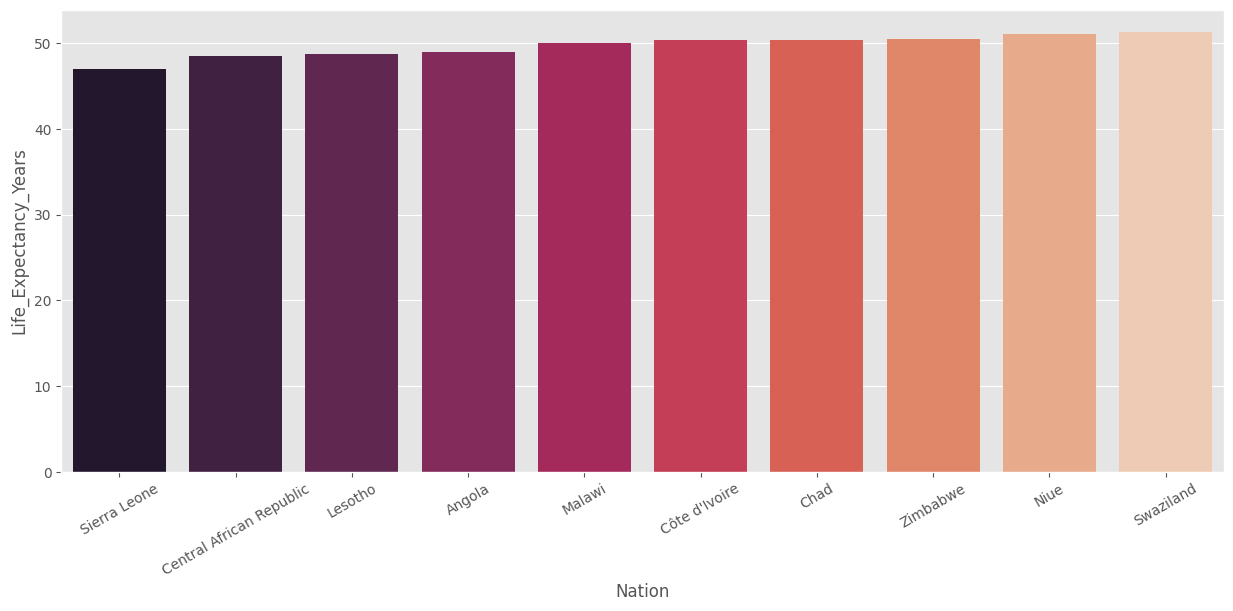

In [54]:
top_countries = country_life_expectancy.sort_values('Life_Expectancy_Years').head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x = 'Nation', y = 'Life_Expectancy_Years', data = top_countries, palette='rocket')

plt.xticks(rotation = 30)

# Show the plot
plt.show()

## Top infant diseases count 

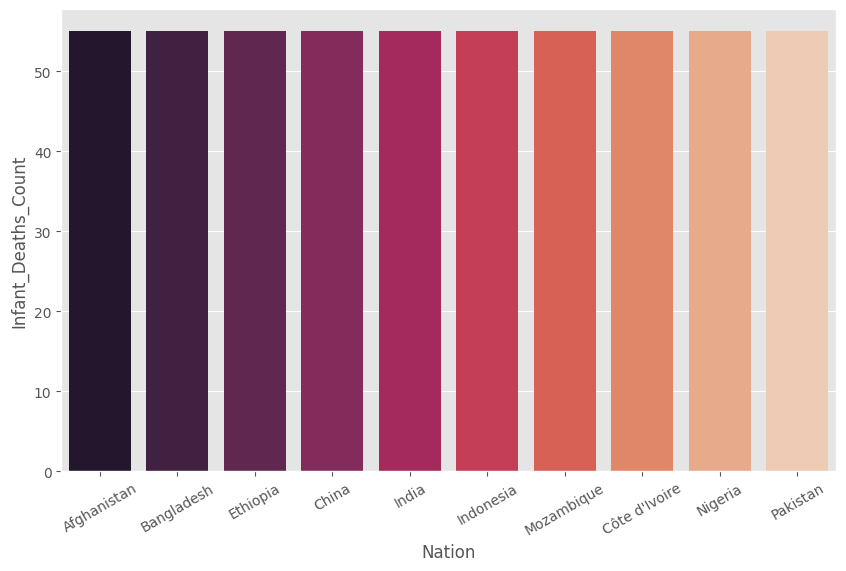

In [55]:
country_Infant_Deaths = data.groupby('Nation')['Infant_Deaths_Count'].mean().reset_index()

top_countries = country_Infant_Deaths.sort_values('Infant_Deaths_Count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x = 'Nation', y = 'Infant_Deaths_Count', data = top_countries, palette='rocket')

plt.xticks(rotation = 30)

plt.show()

## Top Mortality_Adults

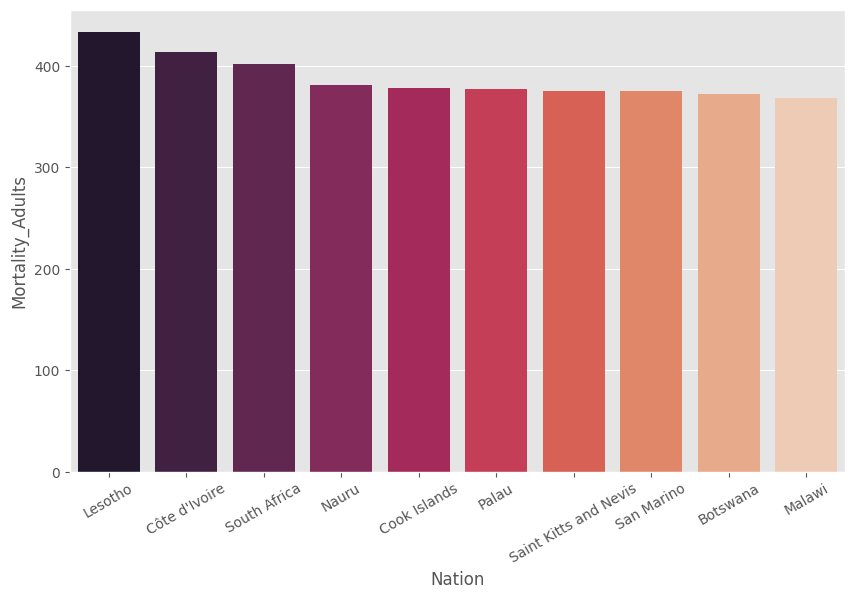

In [56]:
country_Mortality_Adults = data.groupby('Nation')['Mortality_Adults'].mean().reset_index()

top_countries = country_Mortality_Adults.sort_values('Mortality_Adults', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x = 'Nation', y = 'Mortality_Adults', data = top_countries, palette='rocket')

plt.xticks(rotation = 30)

plt.show()

## Lowest Mortality_Adults

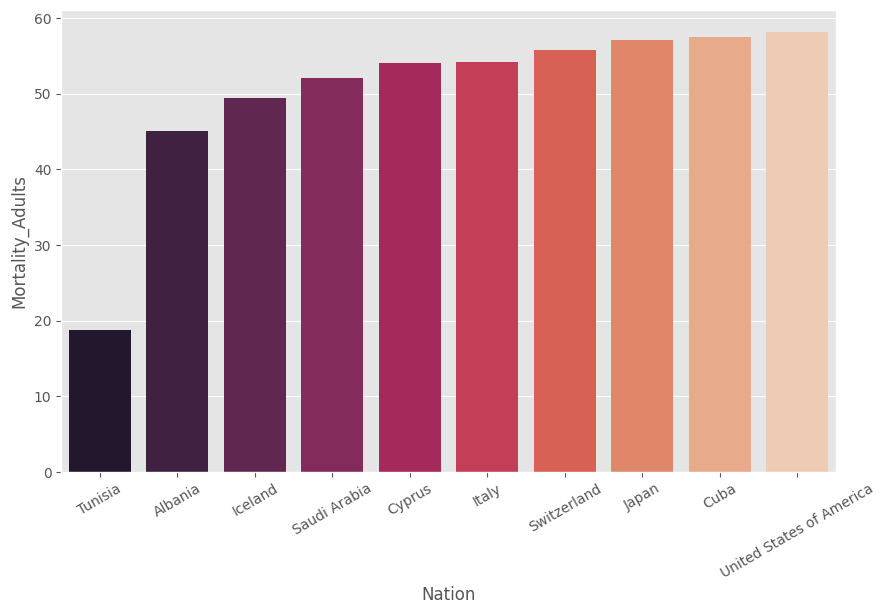

In [57]:
country_Mortality_Adults = data.groupby('Nation')['Mortality_Adults'].mean().reset_index()

top_countries = country_Mortality_Adults.sort_values('Mortality_Adults').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x = 'Nation', y = 'Mortality_Adults', data = top_countries, palette='rocket')

plt.xticks(rotation = 30)

plt.show()

<h1 style="color:darkred; font-size:28px;">Some Correlations and multivariarte analysis</h1>

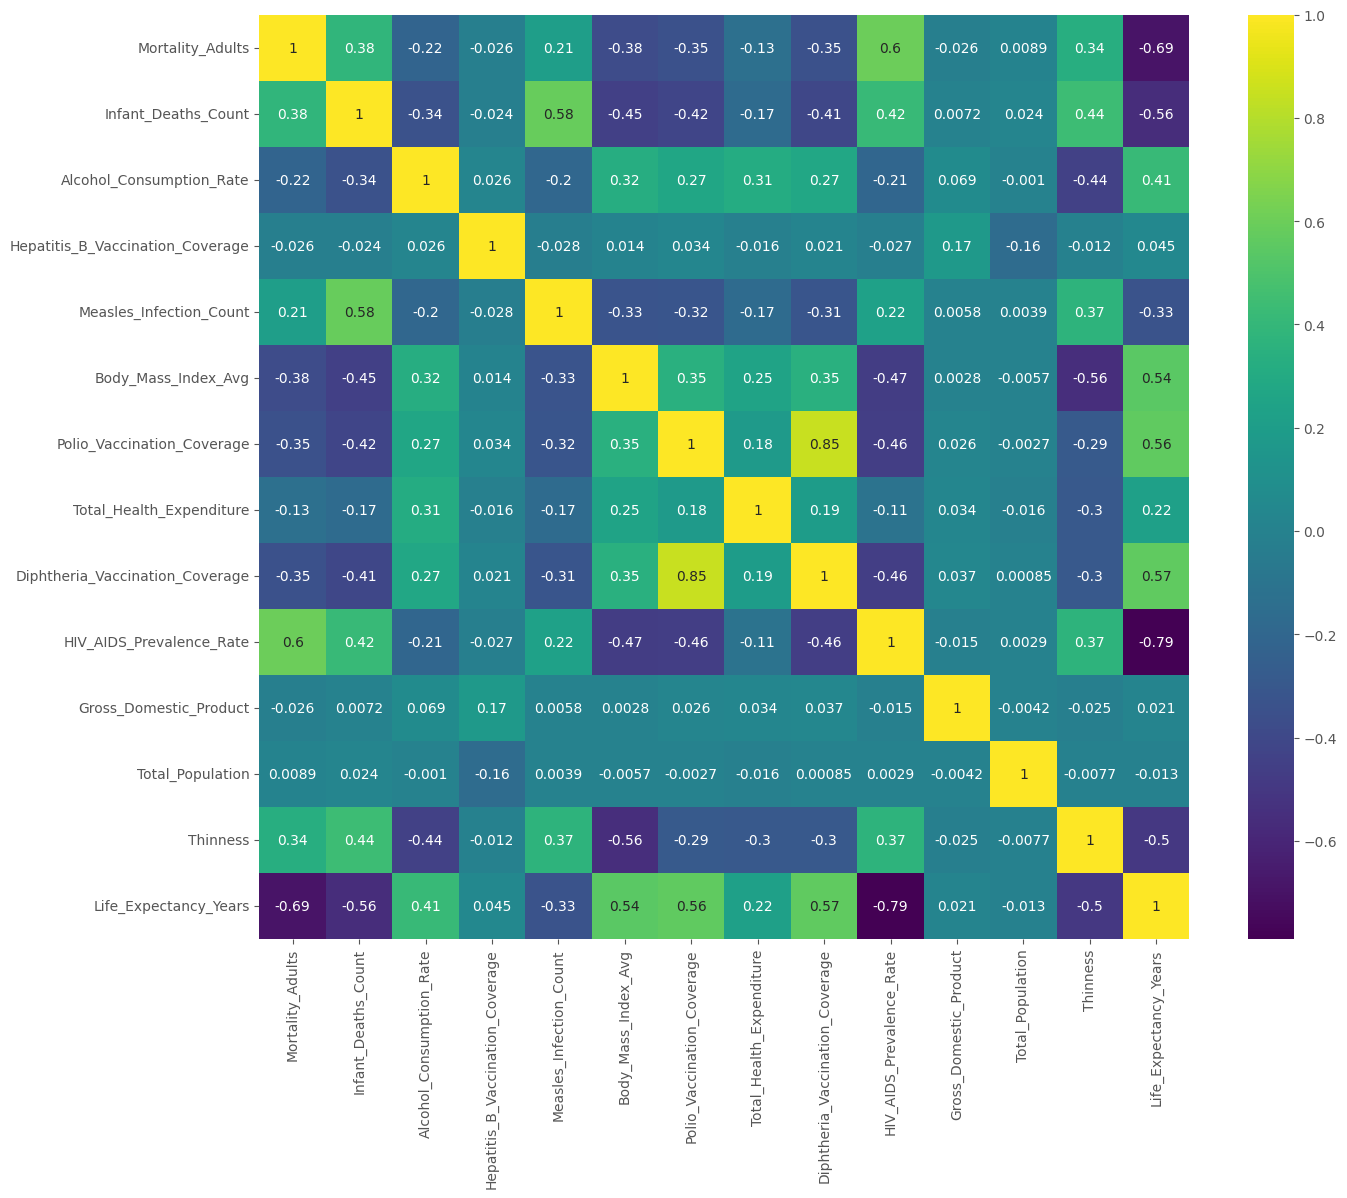

In [58]:

plt.figure(figsize=(15, 12))
sns.heatmap(data[num_col].corr(), cmap='viridis', annot=True)
plt.show()

### I see a strong correlation between Polio_Vaccination_Coverage 
### and negative strong correlation between HIV_AIDS_Prevalence_Rate and Life_Expectancy_Years 
### and also negative correlation between Life expectancy year and mortality adults 

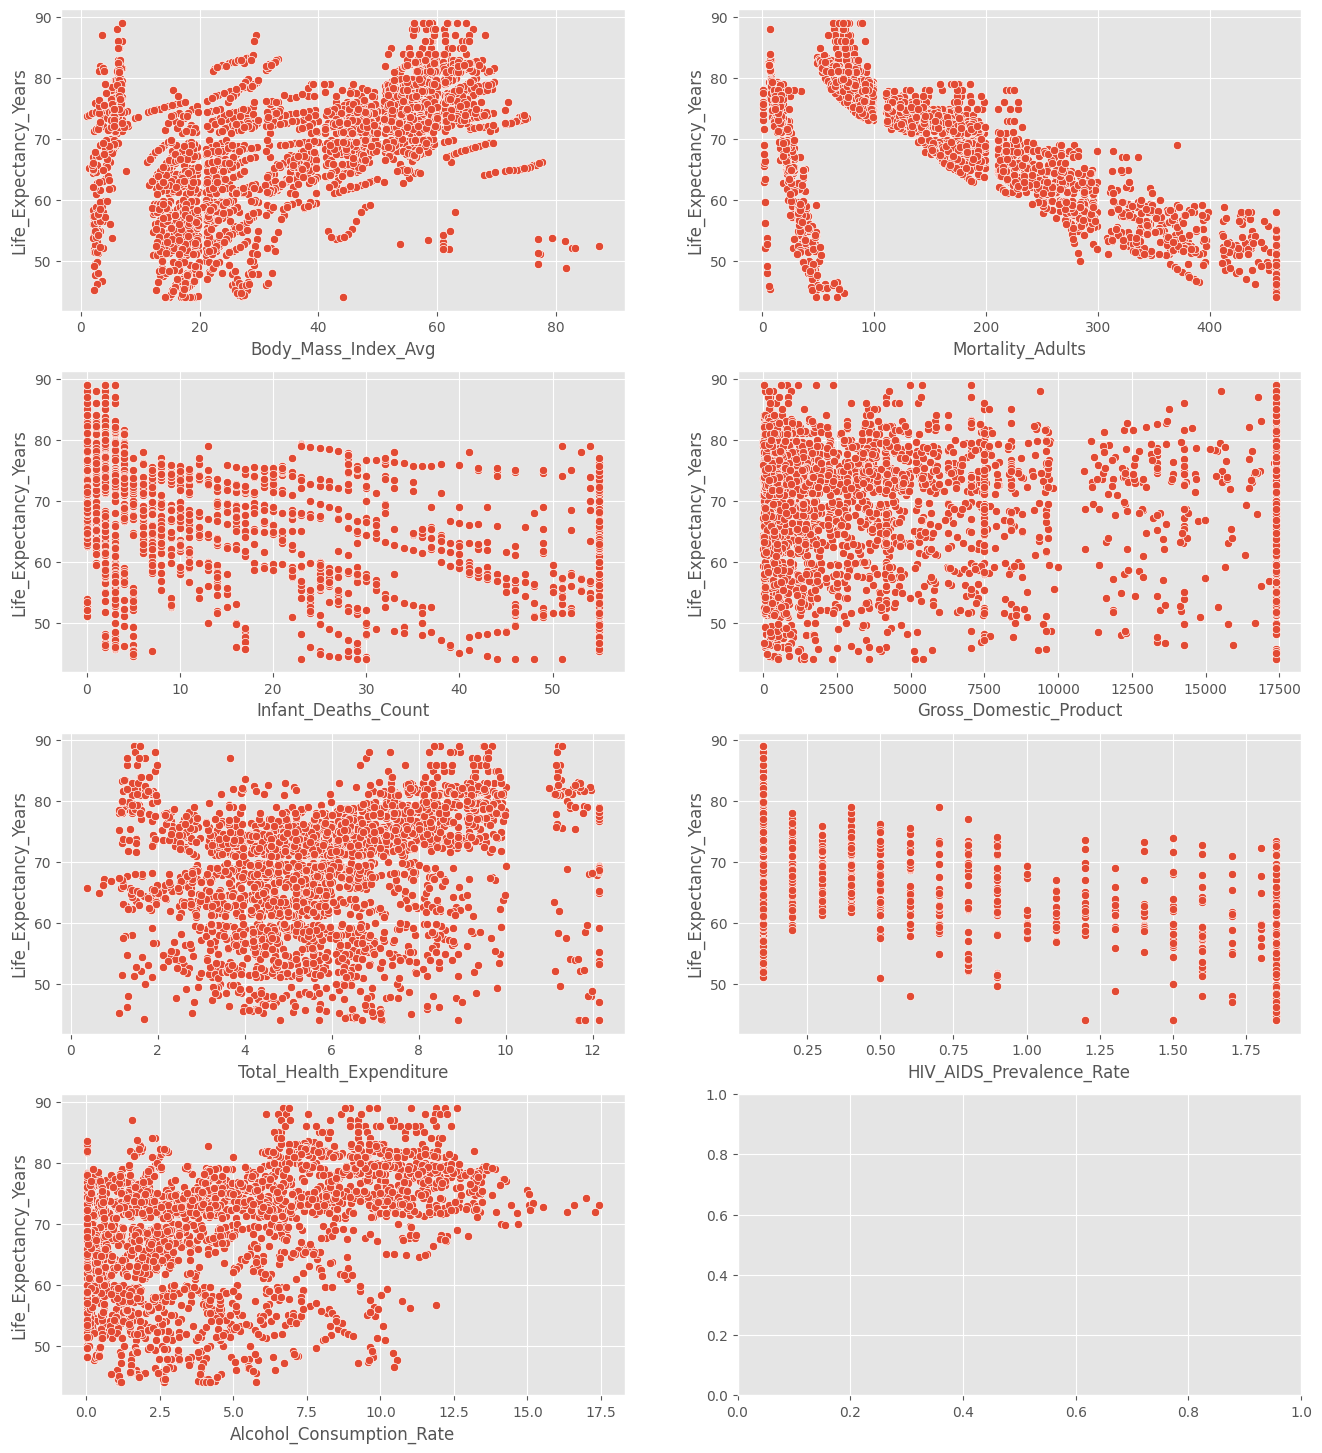

In [59]:
fig, axes = plt.subplots(4, 2, figsize=(16, 18))


sns.scatterplot(data=data, y='Life_Expectancy_Years', x='Body_Mass_Index_Avg', ax=axes[0, 0])
sns.scatterplot(data=data, y='Life_Expectancy_Years', x='Mortality_Adults', ax=axes[0, 1])
sns.scatterplot(data=data, y='Life_Expectancy_Years', x='Infant_Deaths_Count', ax=axes[1, 0])
sns.scatterplot(data=data, y='Life_Expectancy_Years', x='Gross_Domestic_Product', ax=axes[1, 1])
sns.scatterplot(data=data, y='Life_Expectancy_Years', x='Total_Health_Expenditure', ax=axes[2, 0])
sns.scatterplot(data=data, y='Life_Expectancy_Years', x='HIV_AIDS_Prevalence_Rate', ax=axes[2, 1])
sns.scatterplot(data=data, y='Life_Expectancy_Years', x='Alcohol_Consumption_Rate', ax=axes[3, 0])


plt .show()

<h1 style="color:darkred; font-size:28px;">Modeling</h1>

#### some notice 
data_copy is the set i transofrmed the data in  to handle the skewness of the data 
i tried ti use it in moding and i get me a bad result so i used the data without skewness handling and i get me a pretty good and normal result 

In [60]:
# data = data_copy

### Scaling and encoding the data

In [61]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
cat_cols = data.select_dtypes(include = 'object').columns
for cols in cat_cols:
    data[cols] = le.fit_transform(data[cols])

In [62]:
x =  data.drop(columns='Life_Expectancy_Years')
y = data['Life_Expectancy_Years']

In [63]:
scaler = StandardScaler()
cols_to_scale = x.drop(columns='Country_Category').columns
x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])

In [64]:
x.head()

,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness
0,1.278346,-0.330531,1,-0.341655,-0.295142,-0.904714,-0.146766,0.798416,0.505722,-0.146359,-0.906937,-2.261589,-0.629231,-0.554324,1.779448,0.423216
1,-0.980359,-0.330531,0,-0.427762,-0.713826,1.824850,-0.605055,-0.658223,0.984347,0.675028,0.444250,0.679539,-0.629231,1.151054,-0.813709,-0.735594
2,0.300166,-0.113648,1,-0.324434,-0.713826,0.103164,-2.340004,-0.661046,0.939476,0.422294,0.354739,0.426538,-0.629231,0.190813,-0.729334,-0.660020
3,-1.496127,1.404534,1,-1.340491,-0.713826,-0.753909,0.835280,-0.531190,1.223660,0.801395,-0.395447,0.806039,-0.629231,2.217692,-0.552977,0.347641
4,-0.144461,-1.631829,1,2.284593,2.164624,-0.768990,-0.015827,1.886660,-1.194393,-2.263012,-0.523319,-0.205962,1.894640,-0.859484,-0.382529,1.128578


## train and evaluation on the trainig set

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [67]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Extra Trees Regressor': ExtraTreesRegressor(random_state=42),
    'GradientBoost Regressor': GradientBoostingRegressor(random_state=42),
    'XGB Regressor': XGBRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}


for degree in range(1, 6):  
    poly_model_name = f'Polynomial Regression (Degree {degree})'
    models[poly_model_name] = make_pipeline(PolynomialFeatures(degree), LinearRegression())


results = []


for model_name, model in models.items():

    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    
    rmse = mean_squared_error(y_train, y_pred, squared=False)
    r2 = r2_score(y_train, y_pred)
    
    results.append({'Model': model_name, 'RMSE': rmse, 'R2 Score': r2})


results_df = pd.DataFrame(results)
results_df

,Model,RMSE,R2 Score
0,Random Forest,7.345806e-01,0.994019
1,Extra Trees Regressor,9.926153e-14,1.000000
2,GradientBoost Regressor,2.029441e+00,0.954351
3,XGB Regressor,2.156916e-01,0.999484
4,Linear Regression,4.037701e+00,0.819305
5,Polynomial Regression (Degree 1),4.037701e+00,0.819305
6,Polynomial Regression (Degree 2),2.779547e+00,0.914370
7,Polynomial Regression (Degree 3),1.737340e+00,0.966546
8,Polynomial Regression (Degree 4),1.537611e-13,1.000000
9,Polynomial Regression (Degree 5),1.286958e-13,1.000000


## R2 score  on the trainig set 

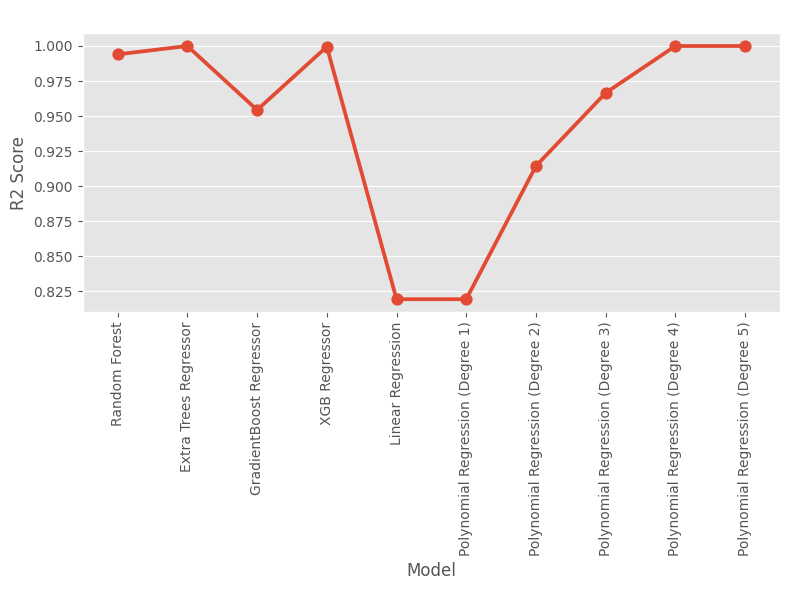

In [68]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='R2 Score',data=results_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: R2 Score')
plt.tight_layout()
plt.show()

## RMSE error on the trainig set 

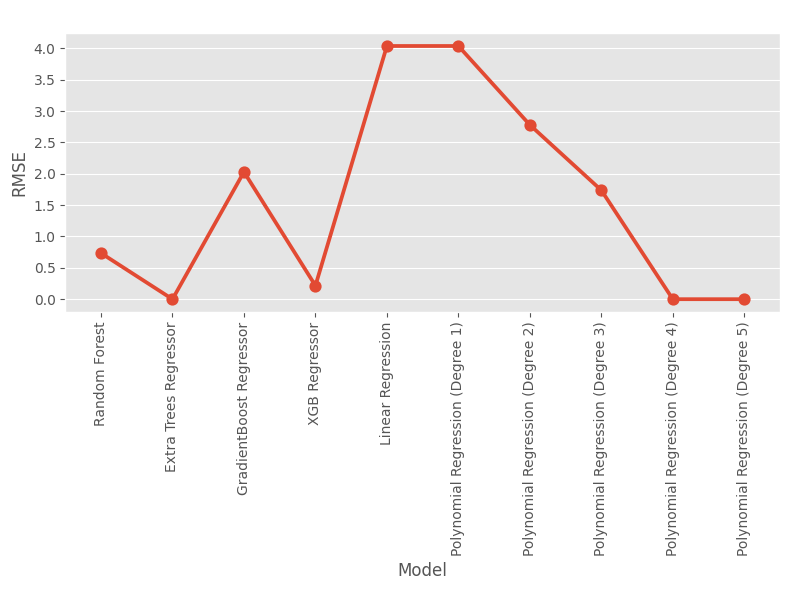

In [69]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='RMSE',data=results_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.tight_layout()
plt.show()

## evaluation using cross validation

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

def rmse_scorer(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)


rmse_score = make_scorer(rmse_scorer, greater_is_better=False)


models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Extra Trees Regressor': ExtraTreesRegressor(random_state=42),
    'GradientBoost Regressor': GradientBoostingRegressor(random_state=42),
    'XGB Regressor': XGBRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}

for degree in range(1, 6):  
    poly_model_name = f'Polynomial Regression (Degree {degree})'
    models[poly_model_name] = make_pipeline(PolynomialFeatures(degree), LinearRegression())

results = []


for model_name, model in models.items():
    
    cv_rmse = cross_val_score(model, x_train, y_train, cv=5, scoring=rmse_score)
    mean_rmse = - np.mean(cv_rmse)  
    cv_r2 = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
    mean_r2 = np.mean(cv_r2)
    
    
    results.append({'Model': model_name, 'Mean RMSE': mean_rmse, 'Mean R2 Score': mean_r2})


results_df_cv = pd.DataFrame(results)
results_df_cv


,Model,Mean RMSE,Mean R2 Score
0,Random Forest,2.041296,0.953301
1,Extra Trees Regressor,1.893989,0.959985
2,GradientBoost Regressor,2.463201,0.932259
3,XGB Regressor,2.094880,0.951043
4,Linear Regression,4.076570,0.814438
5,Polynomial Regression (Degree 1),4.076570,0.814438
6,Polynomial Regression (Degree 2),3.035981,0.896895
7,Polynomial Regression (Degree 3),11.216170,-2.239192
8,Polynomial Regression (Degree 4),13.726542,-1.125714
9,Polynomial Regression (Degree 5),8.404595,0.196721


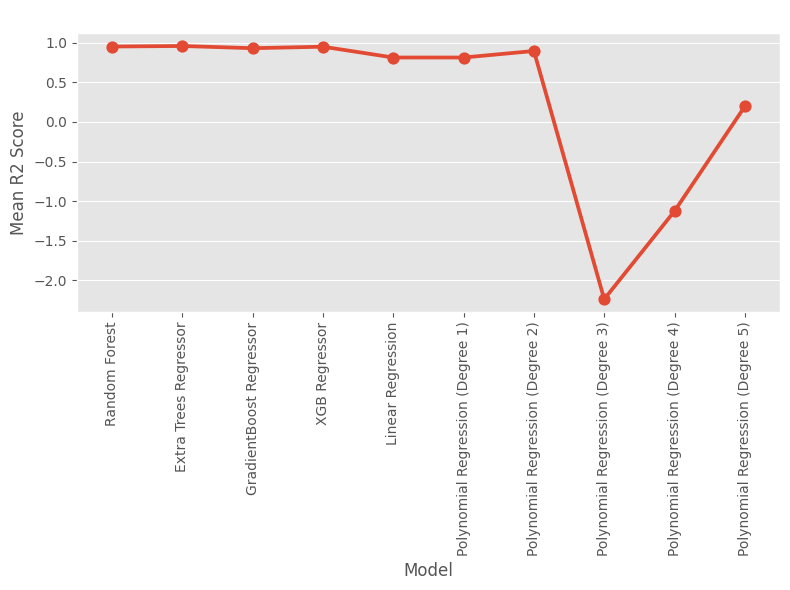

In [74]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='Mean R2 Score',data=results_df_cv)
plt.xticks(rotation=90)
plt.title('Model Comparison: R2 Score')
plt.tight_layout()
plt.show()

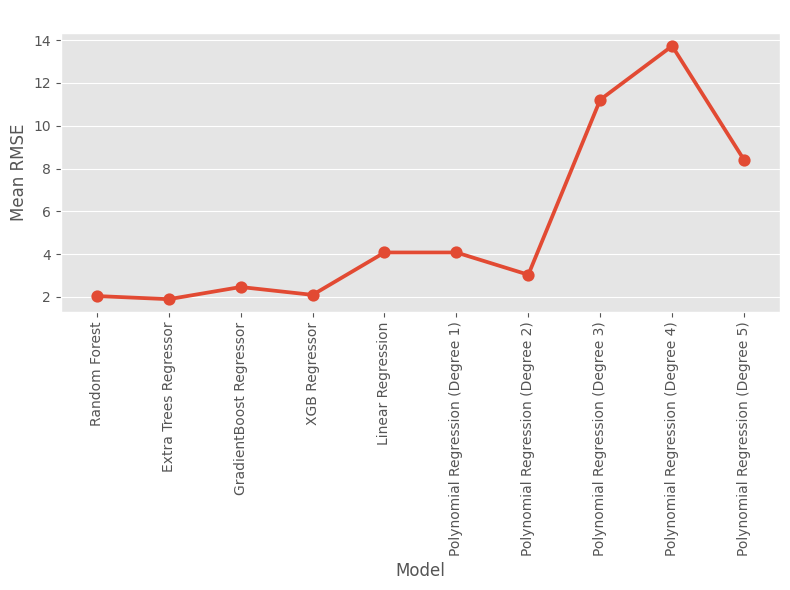

In [75]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='Mean RMSE',data=results_df_cv)
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.tight_layout()
plt.show()

## Validation vs Train

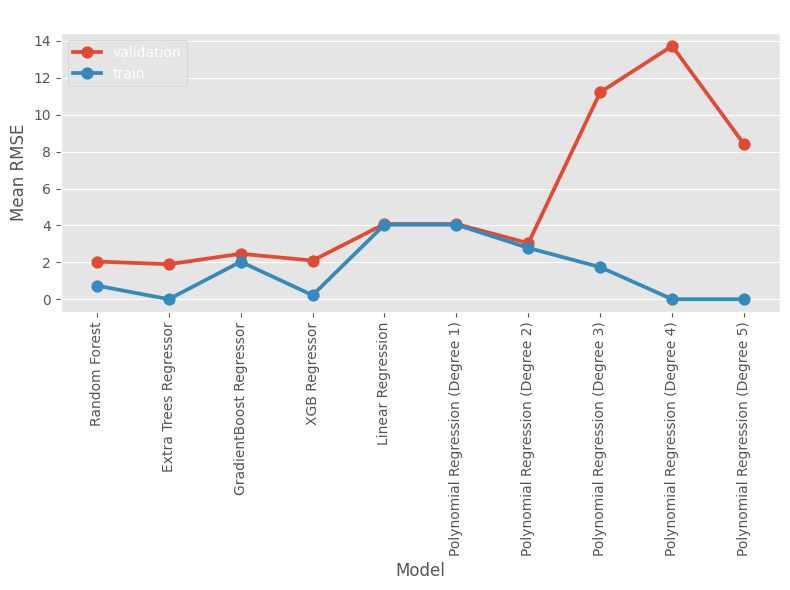

In [76]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='Mean RMSE',data=results_df_cv,label="validation")
sns.pointplot(x='Model',y='RMSE',data=results_df,label="train")
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.legend()
plt.tight_layout()
plt.style.use('bmh')


plt.show()

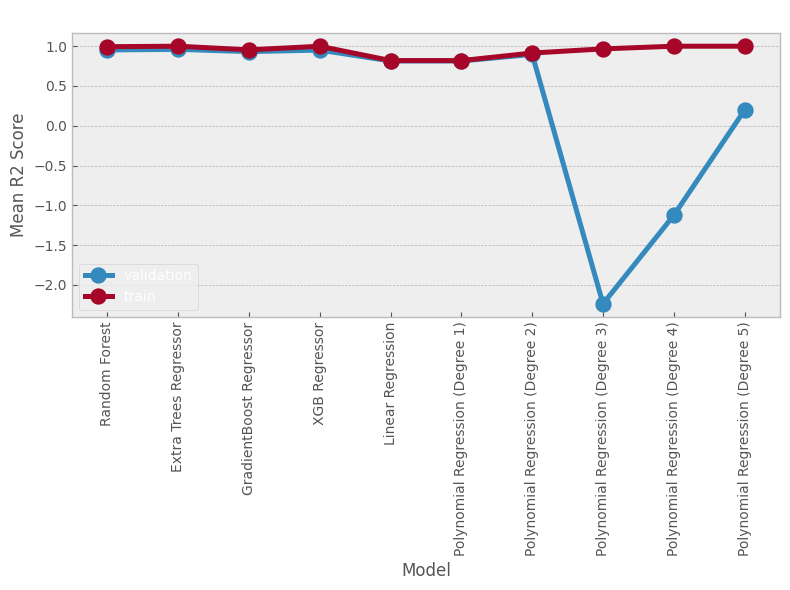

In [77]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='Mean R2 Score',data=results_df_cv,label="validation")
sns.pointplot(x='Model',y='R2 Score',data=results_df,label="train")
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.legend()
plt.tight_layout()

plt.show()

### it seems that the random forest is the best model doing very good on both the validation and train and show no overfit


### test on the test set 

In [78]:
Best_model =  RandomForestRegressor(random_state=42)
Best_model.fit(x_train, y_train)
y_pred =Best_model.predict(x_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [79]:
rmse

2.066371794703358

In [80]:
r2

0.9540849701705021

## the model R2 Score is .954 on the test set which is pretty good